# AIML 2024-2025 Project

* Vince Coppens
* Mateusz Waglowski
* Hamza Yazan Jamal

## Libraries

Install all necesary libraries

In [36]:
# %pip install pandas
# %pip install missingno
# %pip install seaborn
# %pip install matplotlib

Import all necesary libraries

In [37]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Statistical Distributions
from scipy.stats import bernoulli
from scipy.stats import gamma
from scipy.stats import poisson
from scipy.stats import norm  
from scipy.stats import lognorm 
from scipy.stats import beta  
import scipy.stats as stats  

# Date and Time Manipulation
import datetime as dt 

# Data Imputation and Preprocessing
from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer  
from sklearn.preprocessing import StandardScaler  
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

# Warnings Control
import warnings
warnings.filterwarnings('ignore')

## Import and prepare dataset

Import the dataset as a dataframe

In [38]:
title = 'alien_galaxy.csv'
df = pd.read_csv(title)
df.head()

Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
0                   0.0                         0.0                    1.0   
1                   0.0                         0.0                    2.0   
2                   NaN                         0.0                    1.0   
3                   0.0                         0.0                    1.0   
4                   0.0                         0.0                    0.0   

   Precious_Metal_Trade_Tons  Food_Production_Tons  Trade_Agreements_Signed  \
0                       40.0                 107.0                      1.0   
1                      108.0                  49.0                      1.0   
2                      161.0                  53.0                      NaN   
3                      107.0                   NaN                      3.0   
4                       29.0                  59.0                      7.0   

   Last_Contact_Days Discovery_Date  Mineral_Extraction_Tons  Galactic_Visits  \
0               13.0     26-02-2030                    391.0              3.0   
1                NaN     29-11-2028                      NaN              2.0   
2               61.0     22-03-2029                    363.0              5.0   
3                NaN     15-01-2030                     53.0              7.0   
4               24.0     06-08-2029                    177.0              3.0   

   ...  Alien_Population_Count  CO2_Concentration  \
0  ...                 78285.0               10.0   
1  ...                 62772.0               10.0   
2  ...                 69016.0                5.0   
3  ...                 43795.0                NaN   
4  ...                 57957.0                8.0   

   Dominant_Species_Social_Structure  Hydrogen_Concentration  \
0                            Married                   98.55   
1                             Single                   66.36   
2                            Married                   25.23   
3                           Together                   44.59   
4                           Together                   90.67   

   Colonization_Year  Species_Expansion_Response  Galactic_Trade_Revenue  \
0             3118.0                         NaN                    11.0   
1             3099.0                         0.0                    11.0   
2             3100.0                         0.0                    11.0   
3             3098.0                         1.0                    11.0   
4             3089.0                         0.0                    11.0   

   Alien_Civilization_Level  Interstellar_Contact_Cost  \
0                    Master                        3.0   
1                    Master                        3.0   
2                Graduation                        3.0   
3                    Master                        3.0   
4                Graduation                        3.0   

   Interplanetary_Communications  
0                            6.0  
1                            5.0  
2                            8.0  
3                            7.0  
4                            4.0  

[5 rows x 34 columns]

Following variables are part of the dataset:
- **Peace_Treaty_Accords**: Number of formal peace agreements made between alien species.
- **Technological_Advancements**: The level of technological innovations achieved by the planet's inhabitants.
- **Ammonia_Concentration**: The concentration of ammonia in the planet’s atmosphere or environment.
- **Precious_Metal_Trade_Tons**: The total trade volume of precious metals conducted by the planet, measured in tons.
- **Food_Production_Tons**: The amount of food produced on the planet, measured in tons.
- **Trade_Agreements_Signed**: The total number of interplanetary trade agreements signed by the planet's inhabitants.
- **Last_Contact_Days**: The number of days since the last interstellar communication or visit.
- **Discovery_Date**: The date when the planet was first discovered by alien explorers.
- **Mineral_Extraction_Tons**: The quantity of minerals extracted from the planet, measured in tons.
- **Galactic_Visits**: The number of visits made by interstellar travelers to the planet.
- **Sulfur_Concentration**: The level of sulfur present in the planet’s atmosphere or soil.
- **Exploration_Missions**: The number of exploration missions launched to study or survey the planet.
- **Biological_Research_Units**: The amount of biological research conducted on the planet, measured in units.
- **Offspring_Colonies**: The number of colonies established by the dominant species as offspring expansions.
- **Cultural_Exchange_Programs**: The number of cultural exchange initiatives with other planets or species.
- **Military_Engagements**: The number of military conflicts or engagements that have occurred on the planet.
- **Inhabitants_Disputes**: The number of disputes or conflicts among the planet’s inhabitants.
- **Resource_Mining_Operations**: The total number of resource extraction operations active on the planet.
- **Resource_Allocation_Credits**: The amount of credits allocated to managing and distributing resources.
- **Young_Colonies**: Newly established colonies or outposts of the dominant species.
- **HeavyMetals_Concentration**: The concentration of heavy metals in the planet's environment.
- **Terraforming_Initiatives**: The number of projects initiated to alter the planet’s environment to support life.
- **Planet_ID**: A unique identifier assigned to the planet.
- **Liquid_Energy_Consumption_Terawatts**: The planet’s total consumption of liquid energy resources, measured in terawatts.
- **Alien_Population_Count**: The total population of aliens inhabiting the planet.
- **CO2_Concentration**: The concentration of carbon dioxide in the planet’s atmosphere.
- **Dominant_Species_Social_Structure**: The social organization or hierarchy of the planet’s dominant species.
- **Hydrogen_Concentration**: The concentration of hydrogen in the planet’s atmosphere or environment.
- **Colonization_Year**: The year the planet was first colonized by alien species.
- **Species_Expansion_Response**: The dominant species' response or activity related to expanding their influence or territory.
- **Galactic_Trade_Revenue**: The revenue generated from intergalactic trade conducted by the planet.
- **Alien_Civilization_Level**: The level of development and sophistication of the alien civilization inhabiting the planet.
- **Interstellar_Contact_Cost**: The total cost associated with maintaining communication and relations with other planets.
- **Interplanetary_Communications**: The number of communications or signals exchanged between planets.

In [39]:
stats_summary = df.describe()
stats_summary.T

count          mean           std  \
Peace_Treaty_Accords                 2005.0      0.067332      0.250658   
Technological_Advancements           2028.0      0.066075      0.248474   
Ammonia_Concentration                2023.0      1.478992      1.007601   
Precious_Metal_Trade_Tons            2025.0     44.140741     52.559992   
Food_Production_Tons                 1994.0     26.177031     39.685028   
Trade_Agreements_Signed              2033.0      2.310379      1.890865   
Last_Contact_Days                    2006.0     48.879362     29.013427   
Mineral_Extraction_Tons              2032.0    164.693898    223.372040   
Galactic_Visits                      2020.0      5.332178      2.432660   
Sulfur_Concentration                 2031.0      1.984244      1.414822   
Exploration_Missions                 2018.0      2.662042      2.947694   
Biological_Research_Units            2031.0     37.798621     54.970546   
Offspring_Colonies                   2002.0      0.444555      0.539469   
Cultural_Exchange_Programs           2016.0      0.013393      0.114978   
Military_Engagements                 2020.0      0.072277      0.259011   
Inhabitants_Disputes                 2011.0      0.009448      0.096765   
Resource_Mining_Operations           2009.0      5.756098      3.236256   
Resource_Allocation_Credits          2040.0     26.719118     41.015351   
Young_Colonies                       2014.0      0.505958      0.543867   
HeavyMetals_Concentration            2030.0      2.991133      1.044557   
Terraforming_Initiatives             2010.0      0.074627      0.262854   
Planet_ID                            2024.0   5599.124506   3242.617953   
Liquid_Energy_Consumption_Terawatts  1992.0    302.908133    336.165200   
Alien_Population_Count               1999.0  52063.970985  25557.783034   
CO2_Concentration                    2048.0      5.443848      2.889391   
Hydrogen_Concentration               2009.0     59.833430     34.547631   
Colonization_Year                    1980.0   3098.669697     11.935272   
Species_Expansion_Response           2038.0      0.146222      0.353415   
Galactic_Trade_Revenue               1983.0     11.000000      0.000000   
Interstellar_Contact_Cost            2025.0      3.000000      0.000000   
Interplanetary_Communications        2016.0      4.092758      2.708653   

                                         min       25%       50%       75%  \
Peace_Treaty_Accords                    0.00      0.00      0.00      0.00   
Technological_Advancements              0.00      0.00      0.00      0.00   
Ammonia_Concentration                   0.00      1.00      1.00      2.00   
Precious_Metal_Trade_Tons               0.00      8.00     24.00     56.00   
Food_Production_Tons                    0.00      1.00      8.00     33.00   
Trade_Agreements_Signed                 0.00      1.00      2.00      3.00   
Last_Contact_Days                       0.00     24.00     49.00     74.00   
Mineral_Extraction_Tons                 0.00     16.00     67.00    226.50   
Galactic_Visits                         0.00      3.00      6.00      7.00   
Sulfur_Concentration                    0.00      1.00      2.00      3.00   
Exploration_Missions                    0.00      0.00      2.00      4.00   
Biological_Research_Units               0.00      3.00     12.00     50.00   
Offspring_Colonies                      0.00      0.00      0.00      1.00   
Cultural_Exchange_Programs              0.00      0.00      0.00      0.00   
Military_Engagements                    0.00      0.00      0.00      0.00   
Inhabitants_Disputes                    0.00      0.00      0.00      0.00   
Resource_Mining_Operations              0.00      3.00      5.00      8.00   
Resource_Allocation_Credits             0.00      1.00      8.00     32.00   
Young_Colonies                          0.00      0.00      0.00      1.00   
HeavyMetals_Concentration               0.00      2.00      3.00      4.00   

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Peace_Treaty_Accords                 2005 non-null   float64
 1   Technological_Advancements           2028 non-null   float64
 2   Ammonia_Concentration                2023 non-null   float64
 3   Precious_Metal_Trade_Tons            2025 non-null   float64
 4   Food_Production_Tons                 1994 non-null   float64
 5   Trade_Agreements_Signed              2033 non-null   float64
 6   Last_Contact_Days                    2006 non-null   float64
 7   Discovery_Date                       2014 non-null   object 
 8   Mineral_Extraction_Tons              2032 non-null   float64
 9   Galactic_Visits                      2020 non-null   float64
 10  Sulfur_Concentration                 2031 non-null   float64
 11  Exploration_Missions          

Summary Statistics:

* The average number of peace treaty accords signed is approximately 0.067, indicating that peace treaties are signed relatively infrequently.
* Technological advancements have an average occurrence of 0.066, since this is a binary variable this indicates that technological advancements do not much occur.
* The average ammonia concentration is around 1.48 units, with values ranging between 1 and 5.
* Precious metal trade averages 44.14 tons, but the values can vary widely, ranging from 0 to a high of 362 tons.
* Food production averages 26.18 tons, with large variations; some instances produce as little as 1 ton, while the maximum is 199 tons.
* Resource extraction is highly variable, with mineral extraction averaging 164.69 tons, ranging from 0 to as high as 1,725 tons.
* Galactic visits occur at an average rate of 5.33 visits, generally ranging from 2 to 7 visits.
* Exploration missions average 2.66 missions, with most entities conducting between 0 and 4 missions.
* Biological research units average 37.8 units, ranging from 0 to 259 units.
* On average, 0.44 offspring colonies are established per entity, ranging from 0 to a maximum of 2.
* Resource mining operations average 5.76 operations, with a range of 0 to 13 operations per entity.
* The average hydrogen concentration in the system is 59.83 units, varying from 1.03 to 119.99 units.
* Heavy metals concentration averages 2.99 units, typically between 2 and 6 units.

Check whether there are duplicate rows

In [41]:
duplicate_values = False
for i in df.duplicated():
    if i == True:
        print(i)
        duplicate_values = True
if duplicate_values == False:
    print('No duplicate rows were found.')

No duplicate rows were found.


Using Missingno to plot the NaN values.

<Figure size 600x300 with 0 Axes>

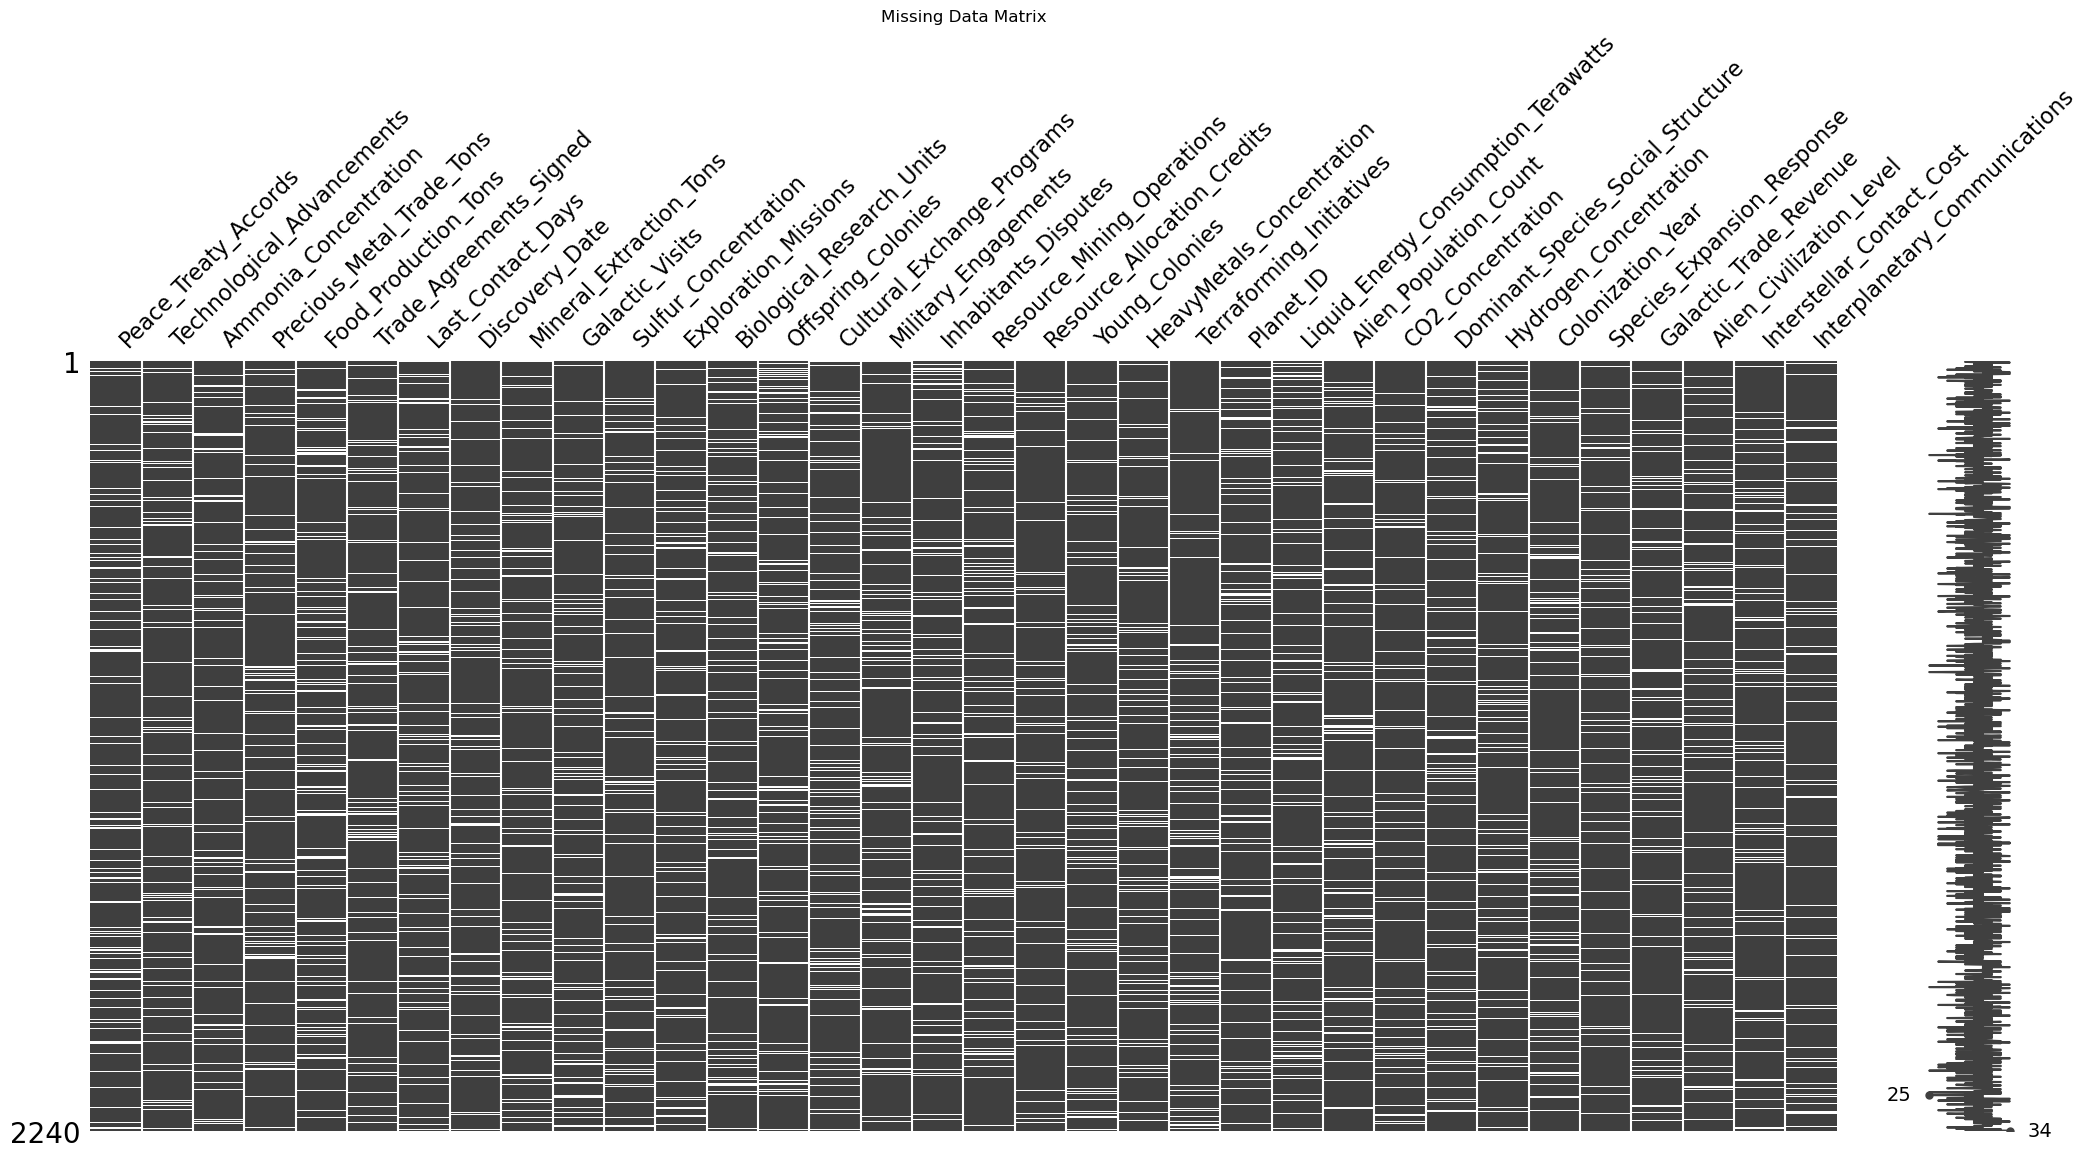

In [42]:
plt.figure(figsize=(6, 3))
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

Number of data rows

In [43]:
print(f'There are {df.shape[0]} rows.')

There are 2240 rows.


Number of NaN's per variable and relative percentage, the next cell shows a graphical representation.

                              Variable  NaN_Count  Relative
0                    Colonization_Year        260  0.116071
1               Galactic_Trade_Revenue        257  0.114732
2  Liquid_Energy_Consumption_Terawatts        248  0.110714
3                 Food_Production_Tons        246  0.109821
4               Alien_Population_Count        241  0.107589
5                   Offspring_Colonies        238  0.106250
6                 Peace_Treaty_Accords        235  0.104911
7                    Last_Contact_Days        234  0.104464
8    Dominant_Species_Social_Structure        233  0.104018
9               Hydrogen_Concentration        231  0.103125


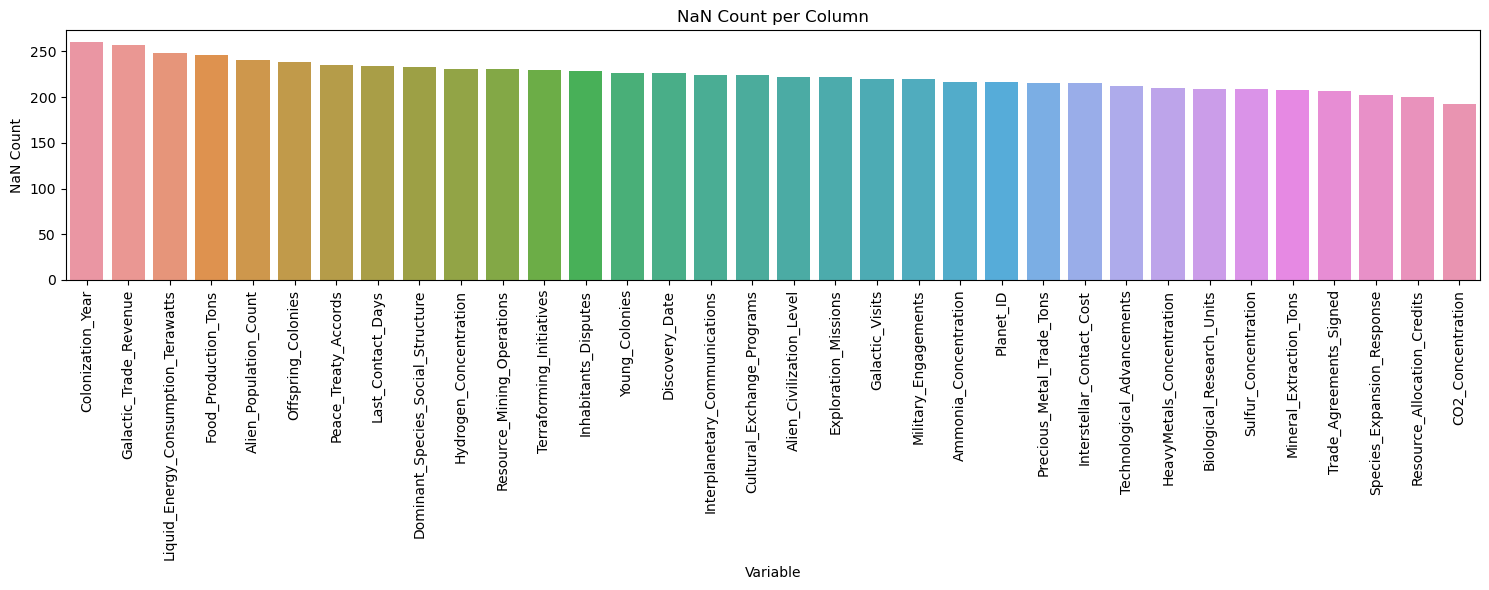

In [69]:
nan_counts = df.isna().sum()
nan_counts_df = nan_counts.to_frame(name='NaN_Count')
nan_counts_df = nan_counts_df.reset_index()
nan_counts_df.columns = ['Variable', 'NaN_Count']
nan_counts_df['Relative'] = nan_counts_df['NaN_Count'] / df.shape[0]
nan_counts_df = nan_counts_df.sort_values(by='Relative', ascending=False)
nan_counts_df = nan_counts_df.reset_index(drop=True)
print(nan_counts_df.head(10))
# Set the figure size
plt.figure(figsize=(15, 6))

# Create a bar plot
sns.barplot(data=nan_counts_df, x='Variable', y='NaN_Count', order=nan_counts_df['Variable'])

# Set labels and title
plt.xlabel("Variable")
plt.ylabel("NaN Count")
plt.title("NaN Count per Column")

# Rotate x-axis labels if needed
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Are there rows who do not miss any value?

In [45]:
complete_rows = df.dropna().shape[0]
total_rows = df.shape[0]

print(f'The percentage of rows without empty values is: {round(complete_rows/total_rows, 2)}%')

The percentage of rows without empty values is: 0.03%


*Only 0.03% of the rows is complete, so we will have to predict some NaN's to make sure we have usefull data. We will go over the variables, check their distributions, correlations and drop the columns which we don't need.*

Drop some columns, we will do this in a new dataframe, as such we still have the data when need it afterwards.
Columns we will drop:
* Planet_ID: not relevant for clustering
* Galactic_Trade_Revenue: This variable has constant value '11', so it is not relevant for the clustering.
* Interstellar_Contact_Cost: This variable has constant value '3', so it is not relevant for the clustering.

In [46]:
#Make a copy of the dataframe, as such we can always retrieve deleted data easily
df_prep = df.drop(['Planet_ID', 'Galactic_Trade_Revenue', 'Interstellar_Contact_Cost'], axis=1)

In [47]:
# Convert discovery_date to timestamp format and afterwards we standardize it, this way we can plot it easily.
df_prep['Discovery_Date'] = pd.to_datetime(df_prep['Discovery_Date'], errors='coerce')
df_prep['Discovery_Date'] = df_prep['Discovery_Date'].apply(
    lambda x: int(x.timestamp()) if pd.notnull(x) else None
)
df_prep['Discovery_Date'] = (df_prep['Discovery_Date']-np.mean(df_prep['Discovery_Date'])) / np.std(df_prep['Discovery_Date'])

df_prep

Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
0                      0.0                         0.0                    1.0   
1                      0.0                         0.0                    2.0   
2                      NaN                         0.0                    1.0   
3                      0.0                         0.0                    1.0   
4                      0.0                         0.0                    0.0   
...                    ...                         ...                    ...   
2235                   0.0                         0.0                    2.0   
2236                   0.0                         0.0                    2.0   
2237                   0.0                         0.0                    1.0   
2238                   0.0                         0.0                    1.0   
2239                   0.0                         NaN                    0.0   

      Precious_Metal_Trade_Tons  Food_Production_Tons  \
0                          40.0                 107.0   
1                         108.0                  49.0   
2                         161.0                  53.0   
3                         107.0                   NaN   
4                          29.0                  59.0   
...                         ...                   ...   
2235                        7.0                   0.0   
2236                        8.0                   0.0   
2237                        4.0                   4.0   
2238                      149.0                  47.0   
2239                       10.0                   2.0   

      Trade_Agreements_Signed  Last_Contact_Days  Discovery_Date  \
0                         1.0               13.0        1.018263   
1                         1.0                NaN       -0.831594   
2                         NaN               61.0       -0.371167   
3                         3.0                NaN        0.847131   
4                         7.0               24.0       -0.053350   
...                       ...                ...             ...   
2235                      1.0                NaN             NaN   
2236                      2.0               39.0        0.647477   
2237                      2.0                0.0        0.403003   
2238                      1.0               92.0       -0.660461   
2239                      2.0               45.0        1.010114   

      Mineral_Extraction_Tons  Galactic_Visits  ...  Terraforming_Initiatives  \
0                       391.0              3.0  ...                       0.0   
1                         NaN              2.0  ...                       0.0   
2                       363.0              5.0  ...                       0.0   
3                        53.0              7.0  ...                       0.0   
4                       177.0              3.0  ...                       0.0   
...                       ...              ...  ...                       ...   
2235                     14.0              5.0  ...                       0.0   
2236                      NaN              5.0  ...                       0.0   
2237                     61.0              4.0  ...                       NaN   
2238                    197.0              4.0  ...                       0.0   
2239                      NaN              7.0  ...                       0.0   

      Liquid_Energy_Consumption_Terawatts  Alien_Population_Count  \
0                                   647.0                 78285.0   
1                                   581.0                 62772.0   
2                                   726.0                 69016.0   
3                                   314.0                 43795.0   
4                                   290.0                 57957.0   
...                                   ...                     ...   
2235                                  8.0                 35924.0   
2236  

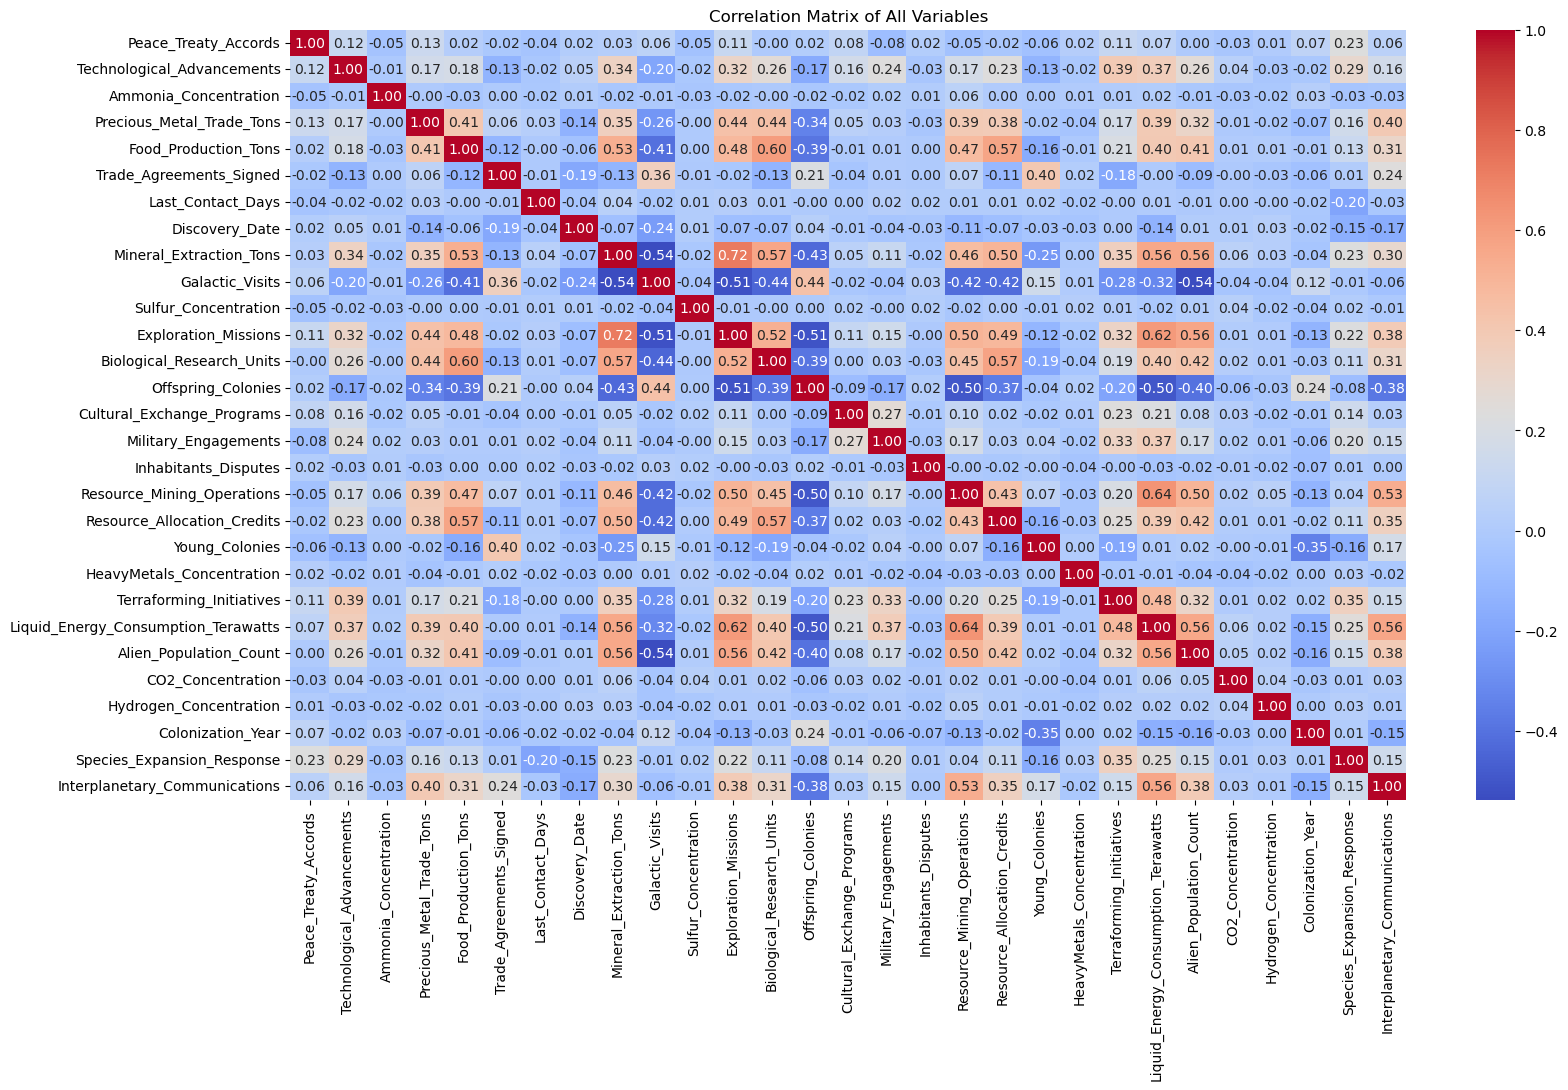

In [48]:
numeric_data = df_prep.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of All Variables")
plt.show()

In [49]:
#Function to calculate and save the biggest correlations. Since we don't pay attention to correlations when filling up the missing values we can see here how big the difference is.
def high_correlations(df, threshold=0.5):
    correlation_matrix = df.corr()

    result = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > threshold:
                result.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlation': abs(corr_value)
                })

    correlation_df = pd.DataFrame(result)
    correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)
    correlation_df = correlation_df.reset_index(drop=True)

    return correlation_df

In [50]:
# call the correlation caluculation function
correlation_df = high_correlations(df_prep)
correlation_df.head()

Variable 1                           Variable 2  \
0     Mineral_Extraction_Tons                 Exploration_Missions   
1  Resource_Mining_Operations  Liquid_Energy_Consumption_Terawatts   
2        Exploration_Missions  Liquid_Energy_Consumption_Terawatts   
3        Food_Production_Tons            Biological_Research_Units   
4   Biological_Research_Units          Resource_Allocation_Credits   

   Correlation  
0     0.723468  
1     0.639129  
2     0.615159  
3     0.599803  
4     0.574609

Here are the interpretations for the top 5 correlations:
* Mineral Extraction Tons and Exploration Missions (0.723): A strong positive correlation indicates that as the volume of mineral extraction increases, the number of exploration missions also tends to increase. This may suggest a coordinated effort where higher extraction activities drive further exploration to discover new resources.
* Resource Mining Operations and Liquid Energy Consumption Terawatts (0.639): There is a moderate to strong positive correlation between mining operations and energy consumption. This relationship likely reflects the high energy demand required for mining activities, suggesting that increases in mining operations are closely tied to higher energy use.
* Exploration Missions and Liquid Energy Consumption Terawatts (0.615): A moderate positive correlation suggests that an increase in exploration missions is associated with an increase in energy consumption. This could imply that energy resources are heavily utilized in exploration efforts, possibly due to the need for power-intensive equipment and technology.
* Food Production Tons and Biological Research Units (0.600): There is a moderate positive correlation, indicating that higher levels of food production are associated with an increase in biological research activities. This relationship might be due to research focused on optimizing food production processes, improving crop yields, or understanding biological factors that affect agriculture.
* Biological Research Units and Resource Allocation Credits (0.575): A moderate positive correlation suggests that as biological research increases, so does the allocation of credits (likely funding or resources) towards it. This relationship could imply that biological research attracts more resources, possibly due to its perceived importance or impact on other sectors, such as food production or health-related research.

In [51]:
# Function to easily plot the distributions of the demanded variables

def perform_graphical_analysis(plots_per_row, columns, df):
    for i in range(0, len(columns), plots_per_row):
        current_columns = columns[i:i+plots_per_row]
        num_current_columns = len(current_columns)
        
        fig, axes = plt.subplots(1, num_current_columns, figsize=(6 * num_current_columns, 6))
        
        # Ensure axes is always a list for easy iteration, even when there's only one plot
        if num_current_columns == 1:
            axes = [axes]

        for j, column in enumerate(current_columns):
            if df[column].nunique() <= 2:
                sns.countplot(x=df[column], ax=axes[j])
                axes[j].set_title(f'Count plot of {column} (binary)')
                axes[j].set_xlabel(column)
                axes[j].set_ylabel('Count')
            else:
                sns.histplot(df[column], kde=True, ax=axes[j])
                axes[j].set_title(f'Distribution of {column}')
                axes[j].set_xlabel(column)
                axes[j].set_ylabel('Frequency')

        plt.tight_layout()
        plt.show()

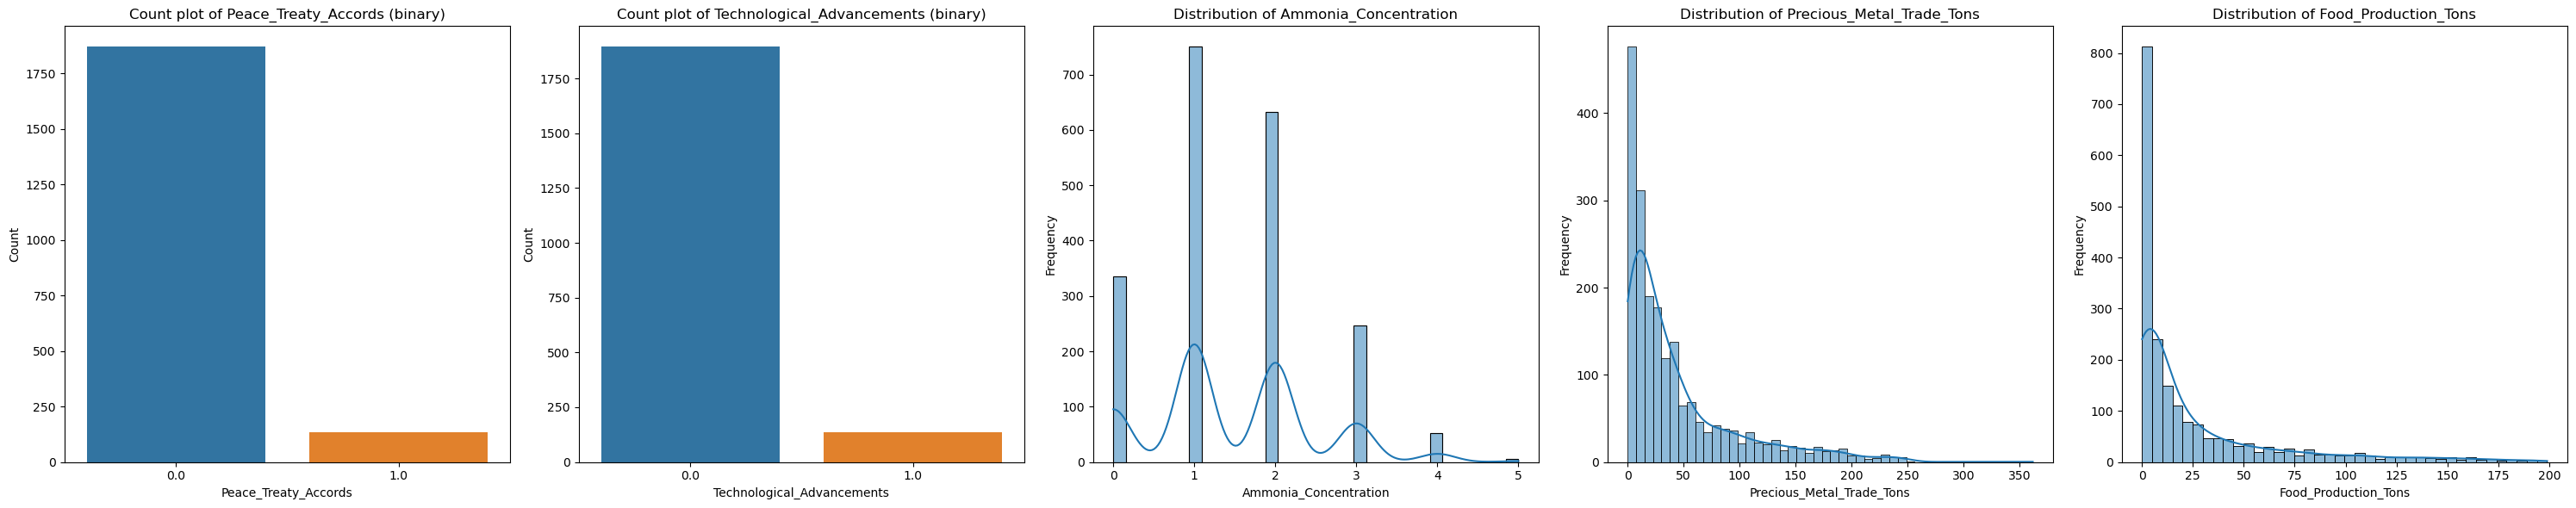

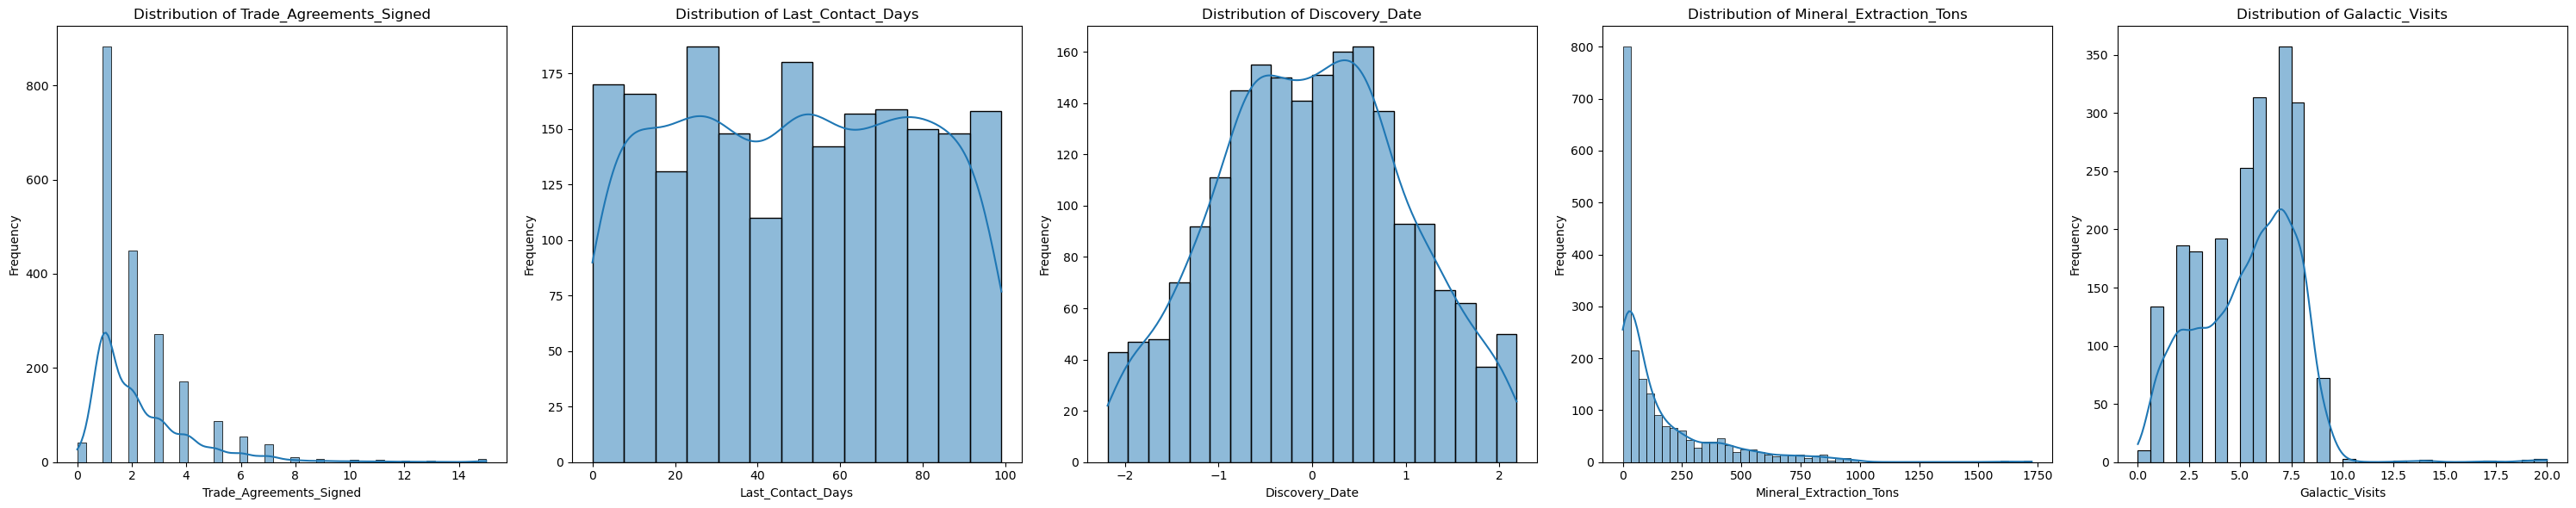

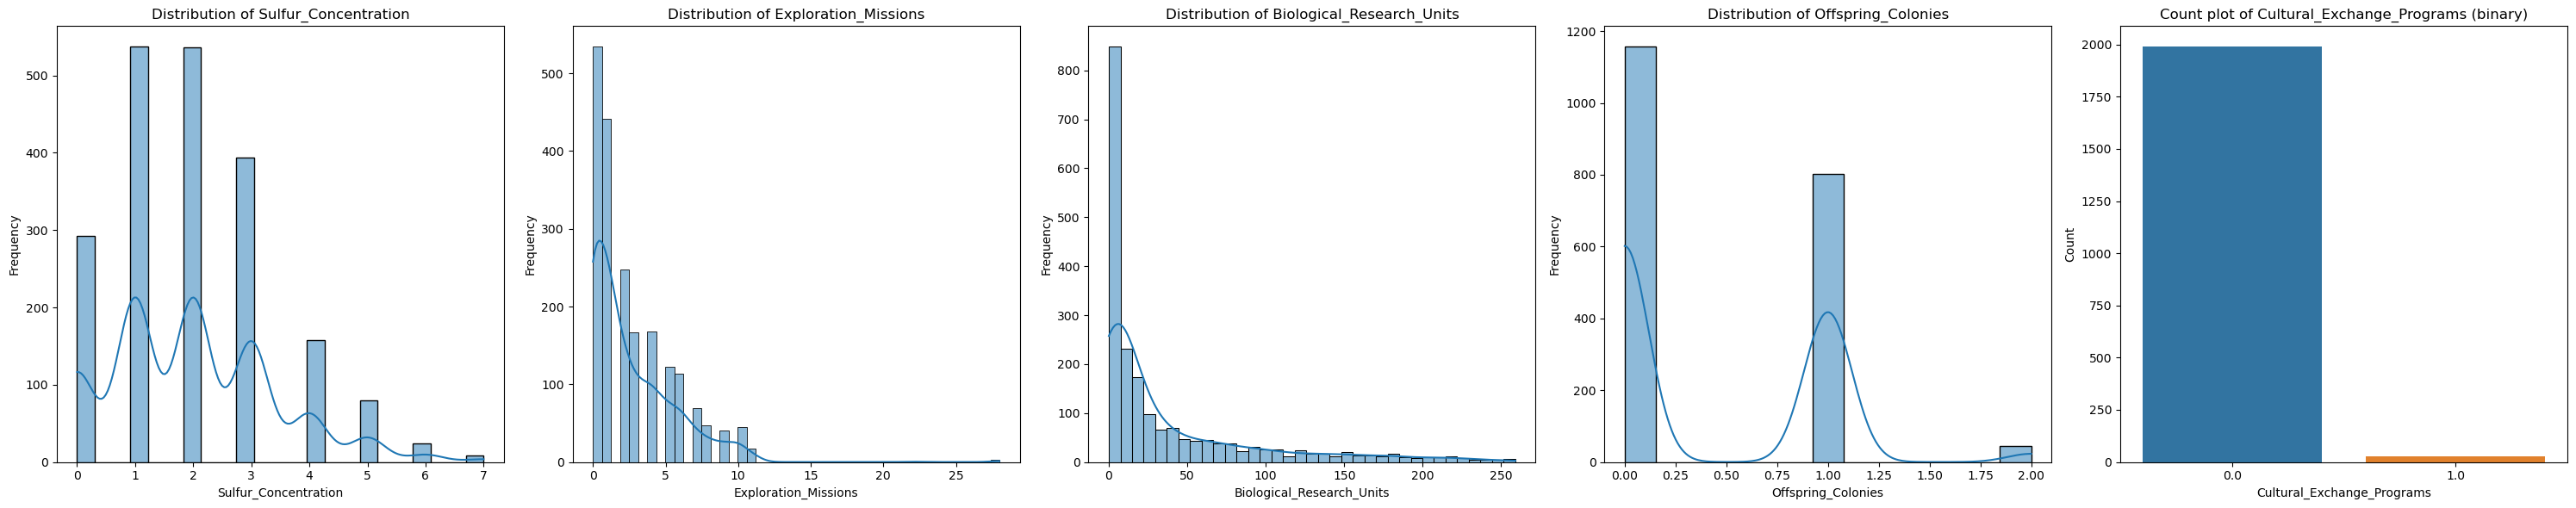

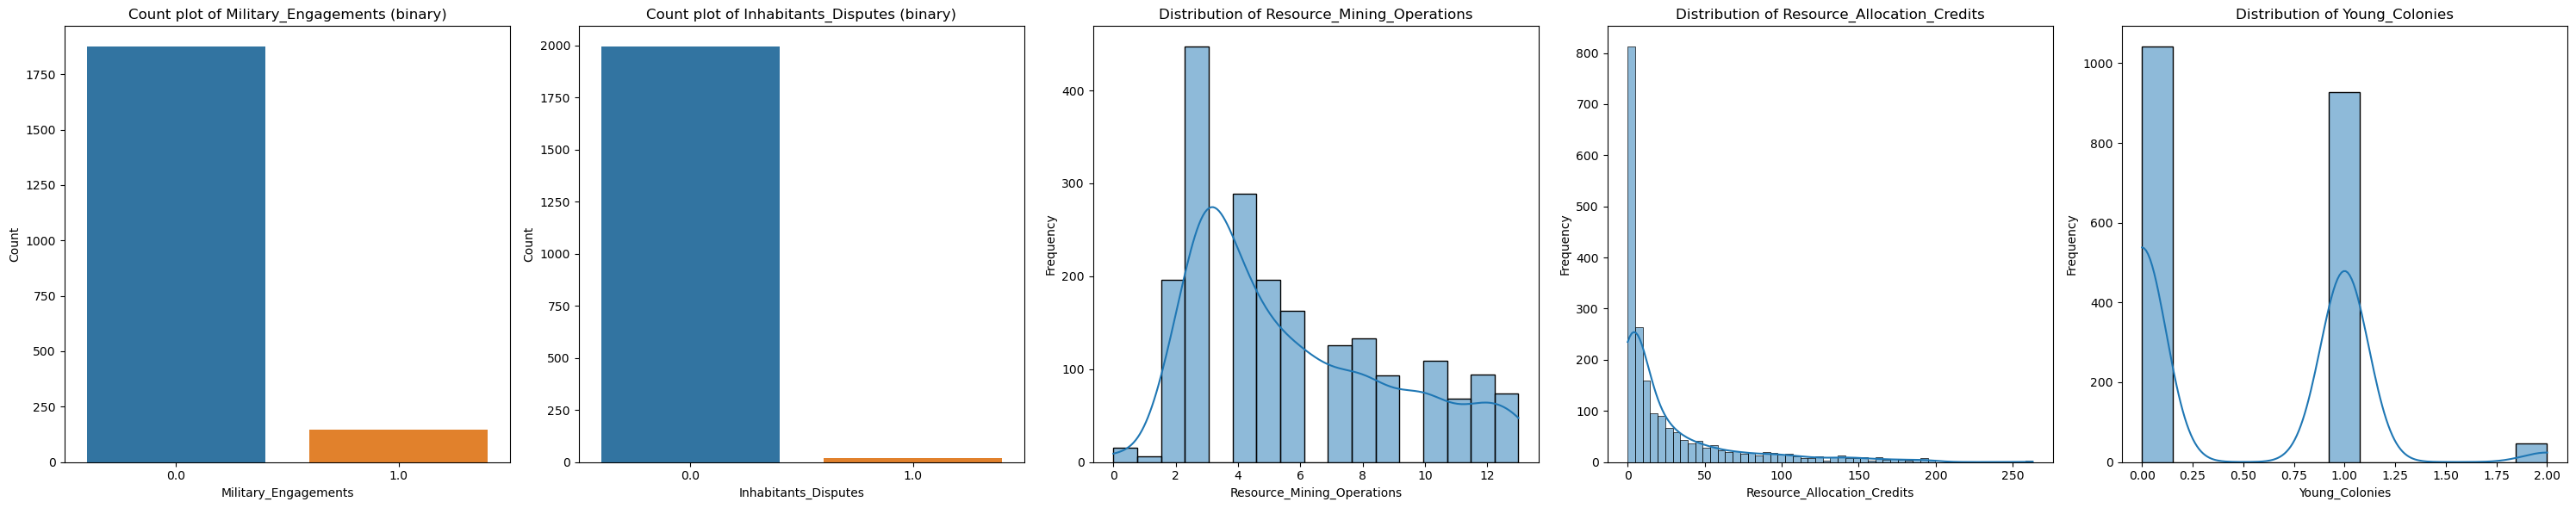

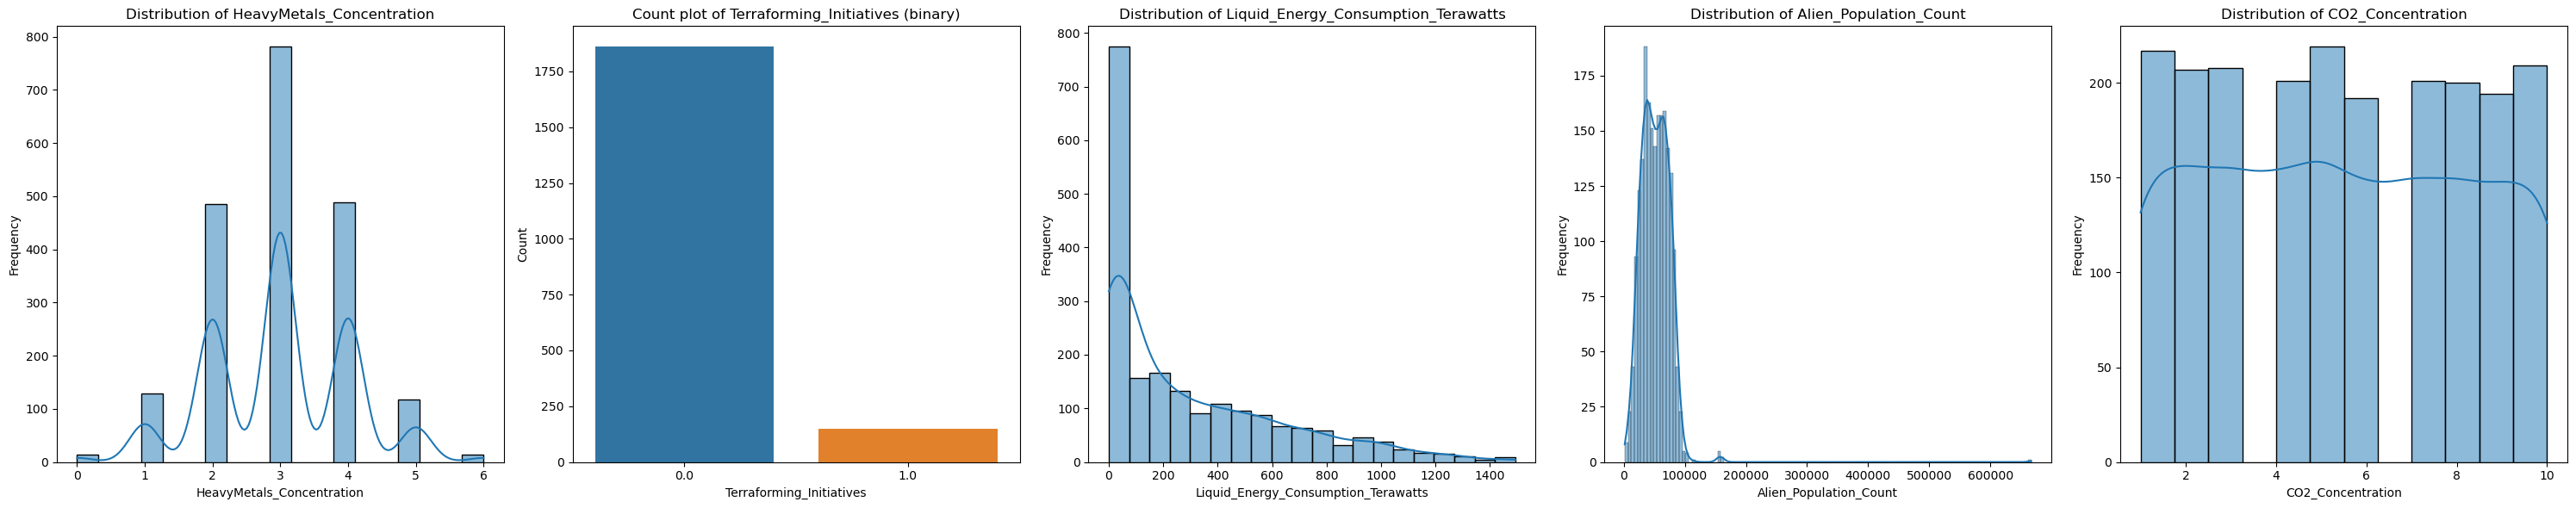

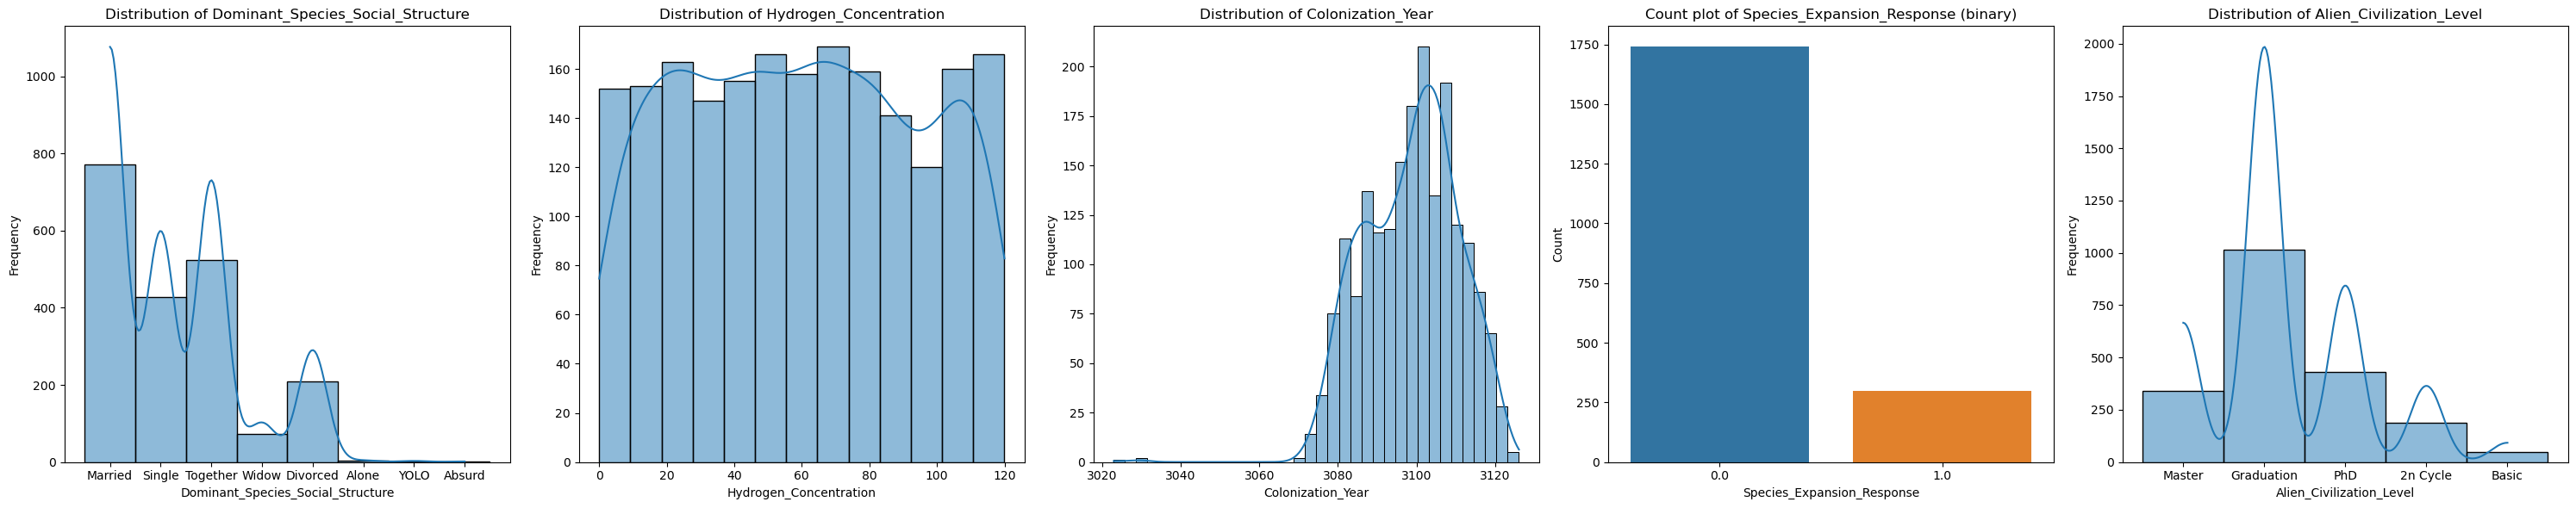

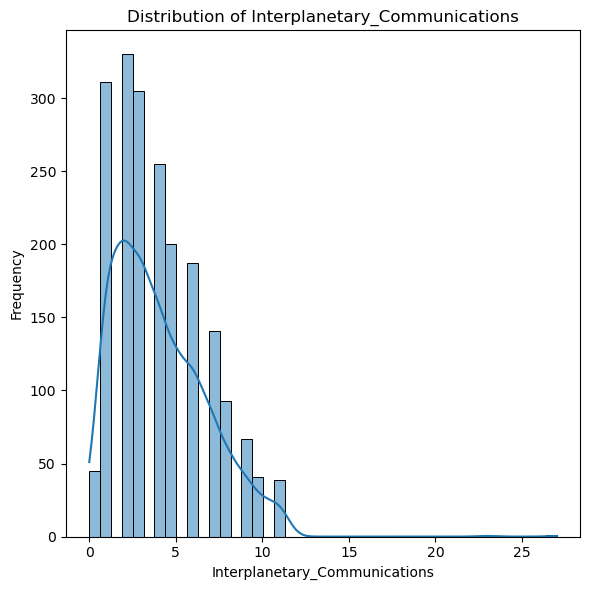

In [52]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 5
columns = df_prep.columns
perform_graphical_analysis(plots_per_row, columns, df_prep)

In [53]:
# Replace the categorical values by numerical values. Alien_Civilization_Level is ordinal, Dominant_Species_Social_Structure not. So we use categorical columns, one-hot encoding resp.

#One hot encoding
# Step 1: Impute missing values in the categorical column
imputer = SimpleImputer(strategy='constant', fill_value='missing')
df_prep['Dominant_Species_Social_Structure'] = imputer.fit_transform(df_prep[['Dominant_Species_Social_Structure']])

# Step 2: Apply one-hot encoding
df_prep = pd.get_dummies(df_prep, columns=['Dominant_Species_Social_Structure'])
df_prep = df_prep.drop(['Dominant_Species_Social_Structure_missing'], axis=1)
# Now df_prep has no missing values in the 'Dominant_Species_Social_Structure' column and is one-hot encoded.


#Categorical to numeral values
df_prep['Alien_Civilization_Level'] = df_prep['Alien_Civilization_Level'].astype('category').cat.codes
df_prep['Alien_Civilization_Level'] = df_prep['Alien_Civilization_Level'].astype(int)
#Nan's are automatically replaced by -1, we put the NaN's back
df_prep['Alien_Civilization_Level'] = df_prep['Alien_Civilization_Level'].replace(-1, np.nan)

df_in_progress = df_prep.copy()
df_in_progress

Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
0                      0.0                         0.0                    1.0   
1                      0.0                         0.0                    2.0   
2                      NaN                         0.0                    1.0   
3                      0.0                         0.0                    1.0   
4                      0.0                         0.0                    0.0   
...                    ...                         ...                    ...   
2235                   0.0                         0.0                    2.0   
2236                   0.0                         0.0                    2.0   
2237                   0.0                         0.0                    1.0   
2238                   0.0                         0.0                    1.0   
2239                   0.0                         NaN                    0.0   

      Precious_Metal_Trade_Tons  Food_Production_Tons  \
0                          40.0                 107.0   
1                         108.0                  49.0   
2                         161.0                  53.0   
3                         107.0                   NaN   
4                          29.0                  59.0   
...                         ...                   ...   
2235                        7.0                   0.0   
2236                        8.0                   0.0   
2237                        4.0                   4.0   
2238                      149.0                  47.0   
2239                       10.0                   2.0   

      Trade_Agreements_Signed  Last_Contact_Days  Discovery_Date  \
0                         1.0               13.0        1.018263   
1                         1.0                NaN       -0.831594   
2                         NaN               61.0       -0.371167   
3                         3.0                NaN        0.847131   
4                         7.0               24.0       -0.053350   
...                       ...                ...             ...   
2235                      1.0                NaN             NaN   
2236                      2.0               39.0        0.647477   
2237                      2.0                0.0        0.403003   
2238                      1.0               92.0       -0.660461   
2239                      2.0               45.0        1.010114   

      Mineral_Extraction_Tons  Galactic_Visits  ...  Alien_Civilization_Level  \
0                       391.0              3.0  ...                       3.0   
1                         NaN              2.0  ...                       3.0   
2                       363.0              5.0  ...                       2.0   
3                        53.0              7.0  ...                       3.0   
4                       177.0              3.0  ...                       2.0   
...                       ...              ...  ...                       ...   
2235                     14.0              5.0  ...                       3.0   
2236                      NaN              5.0  ...                       4.0   
2237                     61.0              4.0  ...                       NaN   
2238                    197.0              4.0  ...                       2.0   
2239                      NaN              7.0  ...                       2.0   

      Interplanetary_Communications  Dominant_Species_Social_Structure_Absurd  \
0                               6.0                                         0   
1                               5.0                                         0   
2                               8.0                                         0   
3                               7.0                                         0   
4                               4.0                                         0   
...                             ...                                     

## Fill up missing values using the distributions

In [54]:
# Functions of the distributions to complete the missing values

# Bernoulli distribution
def impute_with_bernoulli(df, column_name):
    data_column = df[column_name].copy()
    p_success = data_column.mean()
    
    nan_indices = data_column.isna()
    samples = bernoulli(p_success).rvs(size=nan_indices.sum())
    
    data_column.loc[nan_indices] = samples
    
    df[column_name] = data_column

    return df

# Multinomial distribution
def impute_with_multinominal(df,column_name):
    column_data = df[column_name]
    non_nan_data = column_data.dropna()
    
    value_counts = non_nan_data.value_counts(normalize=True).sort_index()
    possible_values = np.arange(int(non_nan_data.min()), int(non_nan_data.max()) + 1)
    probs = [value_counts.get(value, 0) for value in possible_values]
    
    nan_indices = column_data[column_data.isna()].index
    sampled_values = np.random.choice(possible_values, size=len(nan_indices), p=probs)
    
    df.loc[nan_indices, column_name] = sampled_values

    return df

# Gamma distribution
def impute_with_gamma(df, column_name):
    observed_data = df[column_name].dropna()
    shape, loc, scale = gamma.fit(observed_data)

    num_missing = df[column_name].isna().sum()
    imputed_values = gamma.rvs(shape, loc=loc, scale=scale, size=num_missing)
    
    imputed_values_rounded = [int(val) for val in imputed_values]

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

# Uniform distribution
def impute_with_uniform(df, column_name):
    min_val = min(df[column_name])
    max_val = max(df[column_name])
    num_missing = df[column_name].isna().sum()

    imputed_values = np.random.uniform(min_val, max_val, size=num_missing).astype(int)

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values

    return df

# Normal distribution
def impute_with_normal(df, column_name):
    observed_data = df[column_name].dropna()
    loc, scale = norm.fit(observed_data)

    num_missing = df[column_name].isna().sum()
    imputed_values = norm.rvs(loc=loc, scale=scale, size=num_missing)
    
    imputed_values_rounded = [int(val) for val in imputed_values]

    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

# Lognormal distribution
def impute_with_lognormal(df, column_name):
    # Get observed (non-missing) data
    observed_data = df[column_name].dropna()
    
    # Fit a lognormal distribution to the observed data
    shape, loc, scale = lognorm.fit(observed_data, floc=0)  # Fix loc=0 for typical lognormal fits
    
    # Generate imputed values for missing data
    num_missing = df[column_name].isna().sum()
    imputed_values = lognorm.rvs(shape, loc, scale, size=num_missing)
    
    # Round imputed values to integers if needed
    imputed_values_rounded = [int(val) for val in imputed_values]

    # Assign imputed values back to the DataFrame
    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values_rounded

    return df

# Beta distribution
def impute_with_beta(df, column_name):
    observed_data = df[column_name].dropna()
    min_val = observed_data.min()
    max_val = observed_data.max()
    scaled_data = (observed_data - min_val) / (max_val - min_val)
    a, b, loc, scale = beta.fit(scaled_data, floc=0, fscale=1)
    num_missing = df[column_name].isna().sum()
    imputed_scaled_values = beta.rvs(a, b, loc=0, scale=1, size=num_missing)
    imputed_values = imputed_scaled_values * (max_val - min_val) + min_val
    na_indices = df[df[column_name].isna()].index
    df.loc[na_indices, column_name] = imputed_values

    return df

We try to figure out which distributions match the variables. Therefore we perform a test developped by chat GPT. How to interprete the results?
1.	KS Statistic: This value represents the maximum absolute difference between the cumulative distribution function (CDF) of the data and the CDF of the theoretical distribution. A smaller KS statistic suggests a closer match between the data and the theoretical distribution.
2.	P-value: This value indicates the significance of the difference between the data and the theoretical distribution:
* A high p-value (typically above 0.05) suggests that we cannot reject the null hypothesis, meaning the data could plausibly follow the tested distribution.
* A low p-value (below 0.05) suggests a significant difference, meaning the data likely does not follow the tested distribution.

In [55]:
def retrieve_distribution(variable):
# Extract the data for the variable to analyze
    variable_distribution = df_in_progress[variable].dropna()

    # List of distributions to test
    dist_names = ['norm', 'expon', 'gamma', 'lognorm', 'uniform', 'poisson', 'geom', 'binom']
    fit_results = {}

    for dist_name in dist_names:
        try:
            # Get the distribution
            dist = getattr(stats, dist_name)
            
            # Fit the distribution to the data
            if dist_name == 'binom':
                # For binomial, n is approximated as max value, p is fitted
                n = int(variable_distribution.max())
                p = variable_distribution.mean() / n
                params = (n, p)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            elif dist_name == 'poisson':
                # For Poisson, we use the mean as the lambda parameter
                lambda_param = variable_distribution.mean()
                params = (lambda_param,)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            elif dist_name == 'geom':
                # For Geometric, the probability parameter p is approximated as 1 / mean
                p = 1 / variable_distribution.mean()
                params = (p,)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            else:
                # Fit continuous distributions normally
                params = dist.fit(variable_distribution)
                ks_stat, ks_p_value = stats.kstest(variable_distribution, dist_name, args=params)
            
            # Store the results
            fit_results[dist_name] = {'params': params, 'ks_stat': ks_stat, 'p_value': ks_p_value}
            
        except Exception as e:
            # Handle distributions that may fail to fit
            fit_results[dist_name] = {'params': None, 'ks_stat': None, 'p_value': None, 'error': str(e)}

    # Convert results to a DataFrame and sort by p-value (higher indicates a better fit)
    fit_results_df = pd.DataFrame(fit_results).T
    fit_results_df.sort_values('p_value', ascending=False, inplace=True)

    # Display the results
    return fit_results_df

In [56]:
# Divide the variables and perform the retrieve_distribution function on the ones of which we can not immediately recognise the distribution

numeric_data = df_in_progress.select_dtypes(include=['float64', 'int64'])

all_columns = numeric_data.columns
bernoulli_columns = ['Peace_Treaty_Accords', 'Technological_Advancements', 'Cultural_Exchange_Programs', 
                     'Military_Engagements', 'Inhabitants_Disputes', 'Terraforming_Initiatives', 'Species_Expansion_Response'
                     ]
multinomial_columns = ['Ammonia_Concentration', 'Trade_Agreements_Signed', 'Galactic_Visits', 
                       'Offspring_Colonies', 'Resource_Mining_Operations', 'Young_Colonies', 'Sulfur_Concentration', 'Exploration_Missions', 
                       'HeavyMetals_Concentration', 'CO2_Concentration', 'Interplanetary_Communications', 'Alien_Civilization_Level'
                       ]


all_columns = [col for col in all_columns if col not in bernoulli_columns]
all_columns = [col for col in all_columns if col not in multinomial_columns]

filtered_df = numeric_data[all_columns]

results = list()

for column in filtered_df.columns:
    results_df_for_column = retrieve_distribution(column)
    top_result = results_df_for_column.iloc[0].copy()
    top_result['variable'] = column
    top_result['best_distribution'] = results_df_for_column.index[0]
    results.append(top_result)

results_df = pd.DataFrame(results).reset_index(drop=True)
results_df

params   ks_stat       p_value  \
0   (0.6616654656103012, -1.5701225791501072e-27, ...  0.060974  5.486718e-07   
1   (0.4751850655693679, -1.0225859724409498e-27, ...  0.182046  2.661821e-58   
2                                         (0.0, 99.0)  0.022992  2.358298e-01   
3   (0.016727736911768827, -59.79191312877824, 59....  0.023720  2.038971e-01   
4   (1.6194690828692555, -0.07847949517516009, 58....  0.056421  4.600222e-06   
5   (0.36349299679333014, -2.8825664562810563e-29,...  0.169867  1.053500e-51   
6   (0.5348456301745077, -9.249853540613464e-28, 2...  0.187255  4.249597e-63   
7   (0.7546798263384407, -2.690828140947089e-24, 2...  0.147224  3.774609e-38   
8   (8.707456428145694, -15585.850024985171, 7754....  0.053277  2.263077e-05   
9                                      (0.03, 119.96)  0.017448  5.675432e-01   
10             (3098.669696969697, 11.93225790435538)  0.059032  1.935768e-06   

                               variable best_distribution  
0             Precious_Metal_Trade_Tons             gamma  
1                  Food_Production_Tons             gamma  
2                     Last_Contact_Days           uniform  
3                        Discovery_Date           lognorm  
4               Mineral_Extraction_Tons           lognorm  
5             Biological_Research_Units             gamma  
6           Resource_Allocation_Credits             gamma  
7   Liquid_Energy_Consumption_Terawatts             gamma  
8                Alien_Population_Count             gamma  
9                Hydrogen_Concentration           uniform  
10                    Colonization_Year              norm

In [57]:
# For some reason Python thinks Discovery_Date is lognorm but the values are normally distributed (we satndardized it) and so it also has negative values.
results_df.loc[results_df["variable"] == 'Discovery_Date', "best_distribution"] = 'norm'

In [58]:
# If we want to check the distribution for 1 specific variable, we can use this cell

# results_df = retrieve_distribution('Precious_Metal_Trade_Tons')
# results_df

In [59]:
# Fill the missing values up using the distributions
distribution_functions = {
    "bernoulli": (bernoulli_columns, impute_with_bernoulli),
    "multinomial": (multinomial_columns, impute_with_multinominal),
    "gamma": (results_df[results_df["best_distribution"] == "gamma"]["variable"].tolist(), impute_with_gamma),
    "uniform": (results_df[results_df["best_distribution"] == "uniform"]["variable"].tolist(), impute_with_uniform),
    "norm": (results_df[results_df["best_distribution"] == "norm"]["variable"].tolist(), impute_with_normal),
    "beta": (results_df[results_df["best_distribution"] == "beta"]["variable"].tolist(), impute_with_beta),
    "lognorm": (results_df[results_df["best_distribution"] == "lognorm"]["variable"].tolist(), impute_with_gamma)
}

# Loop through each distribution and impute columns
for distribution, (columns_to_impute, impute_function) in distribution_functions.items():
    try:
        for col in columns_to_impute:
            df_in_progress = impute_function(df_in_progress, col)
    except Exception as e:
        print(e)

# Check for remaining missing values
df_in_progress.isna().sum()

Peace_Treaty_Accords                          0
Technological_Advancements                    0
Ammonia_Concentration                         0
Precious_Metal_Trade_Tons                     0
Food_Production_Tons                          0
Trade_Agreements_Signed                       0
Last_Contact_Days                             0
Discovery_Date                                0
Mineral_Extraction_Tons                       0
Galactic_Visits                               0
Sulfur_Concentration                          0
Exploration_Missions                          0
Biological_Research_Units                     0
Offspring_Colonies                            0
Cultural_Exchange_Programs                    0
Military_Engagements                          0
Inhabitants_Disputes                          0
Resource_Mining_Operations                    0
Resource_Allocation_Credits                   0
Young_Colonies                                0
HeavyMetals_Concentration               

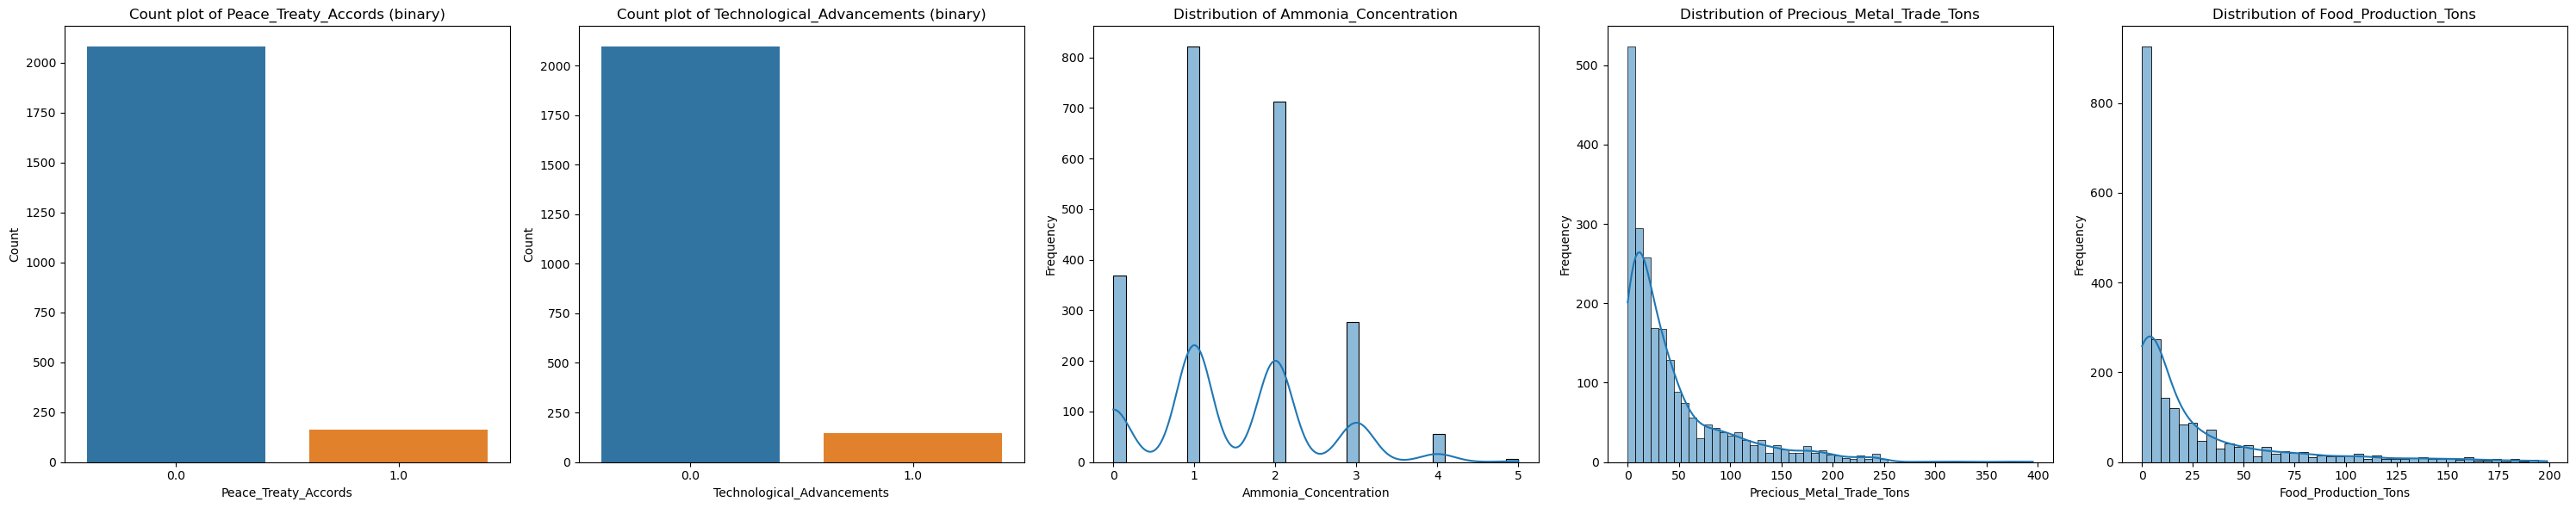

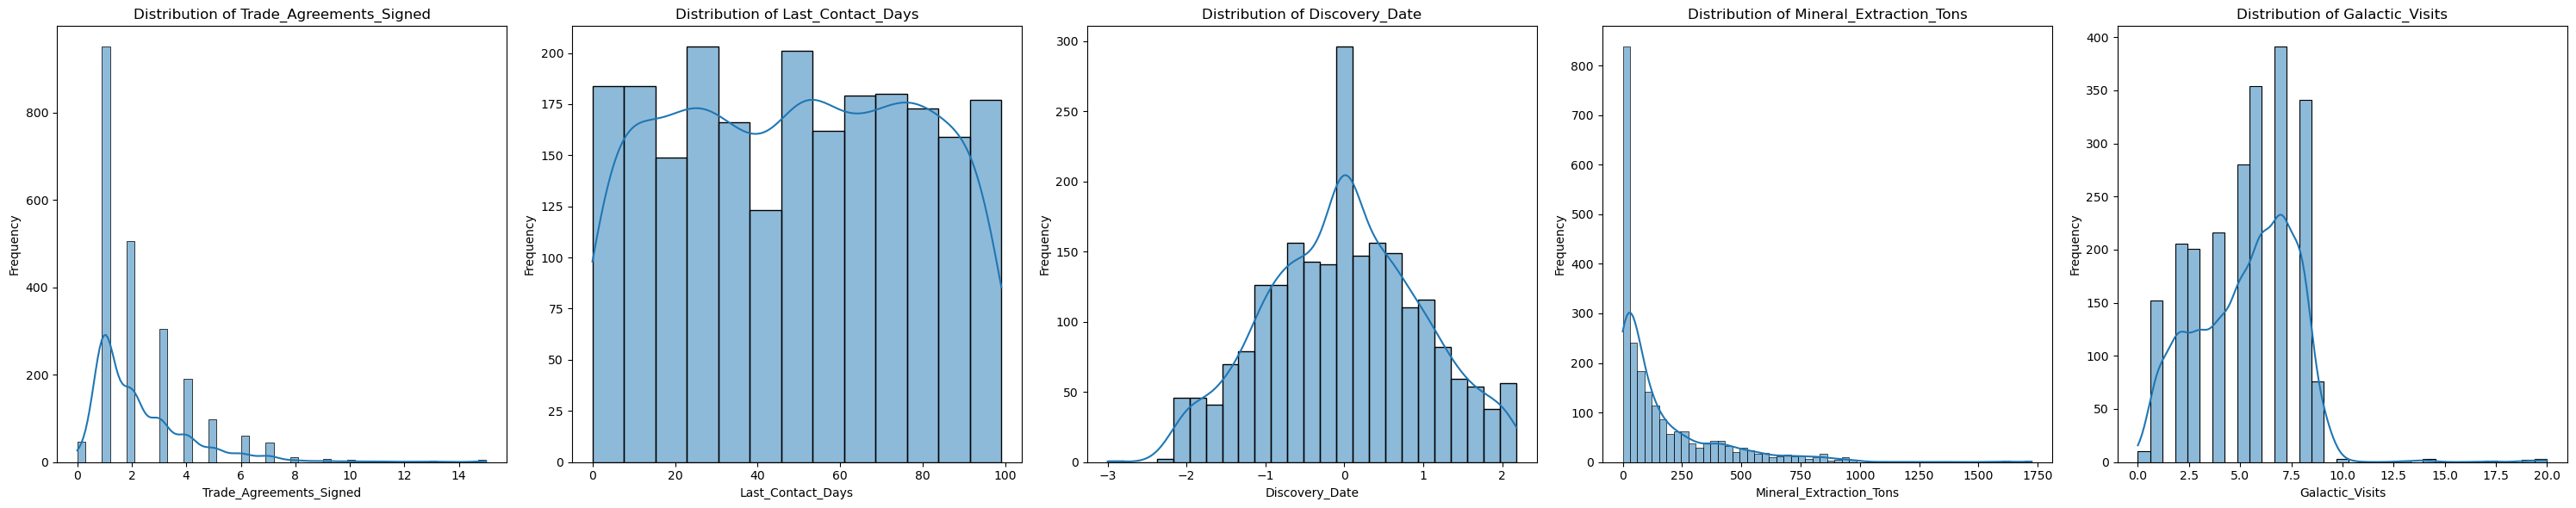

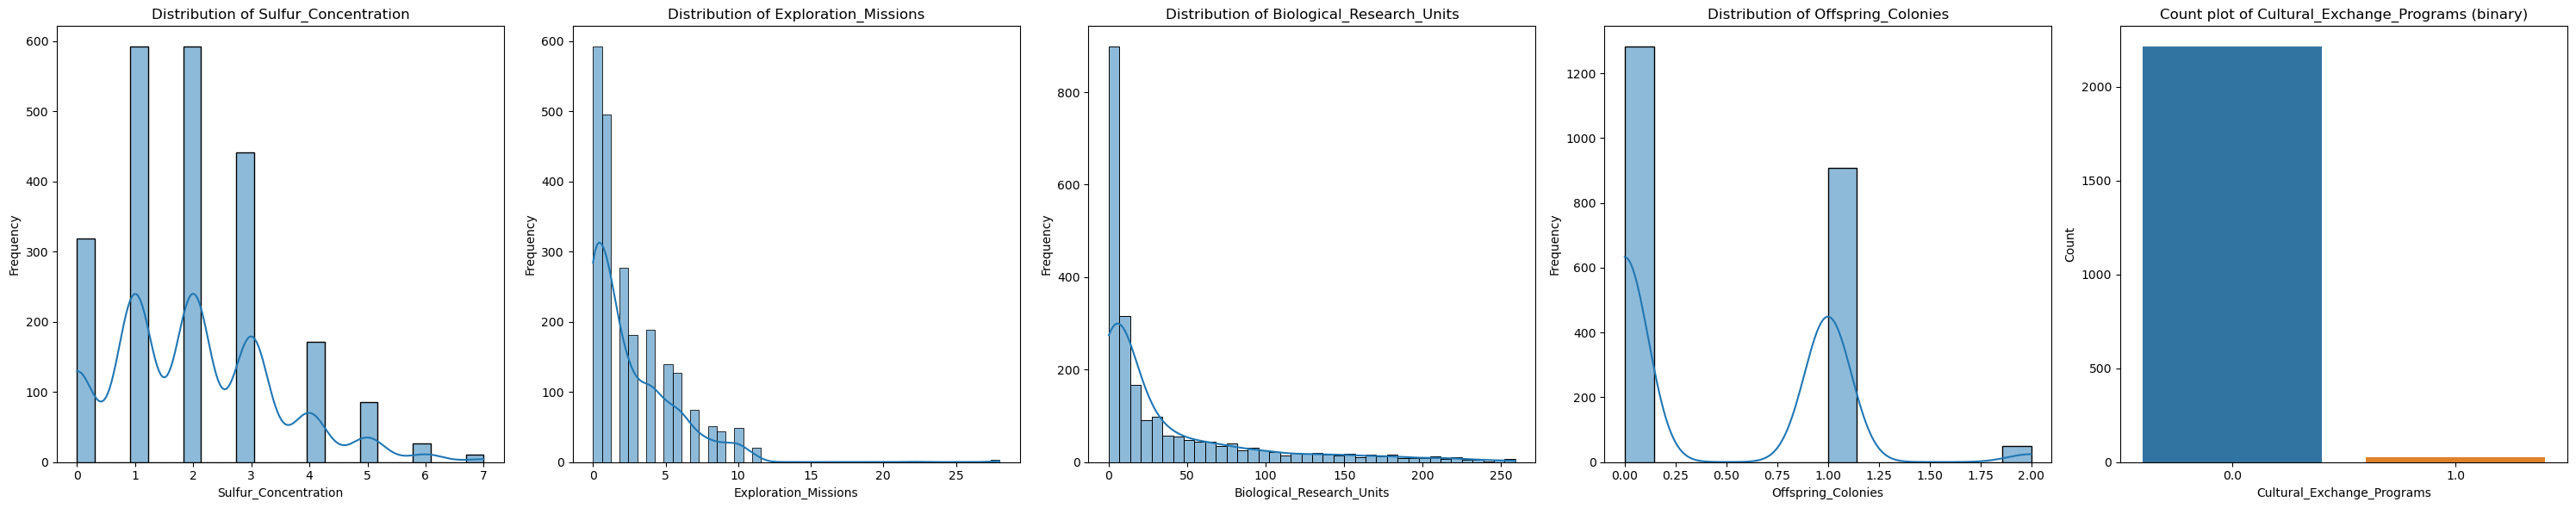

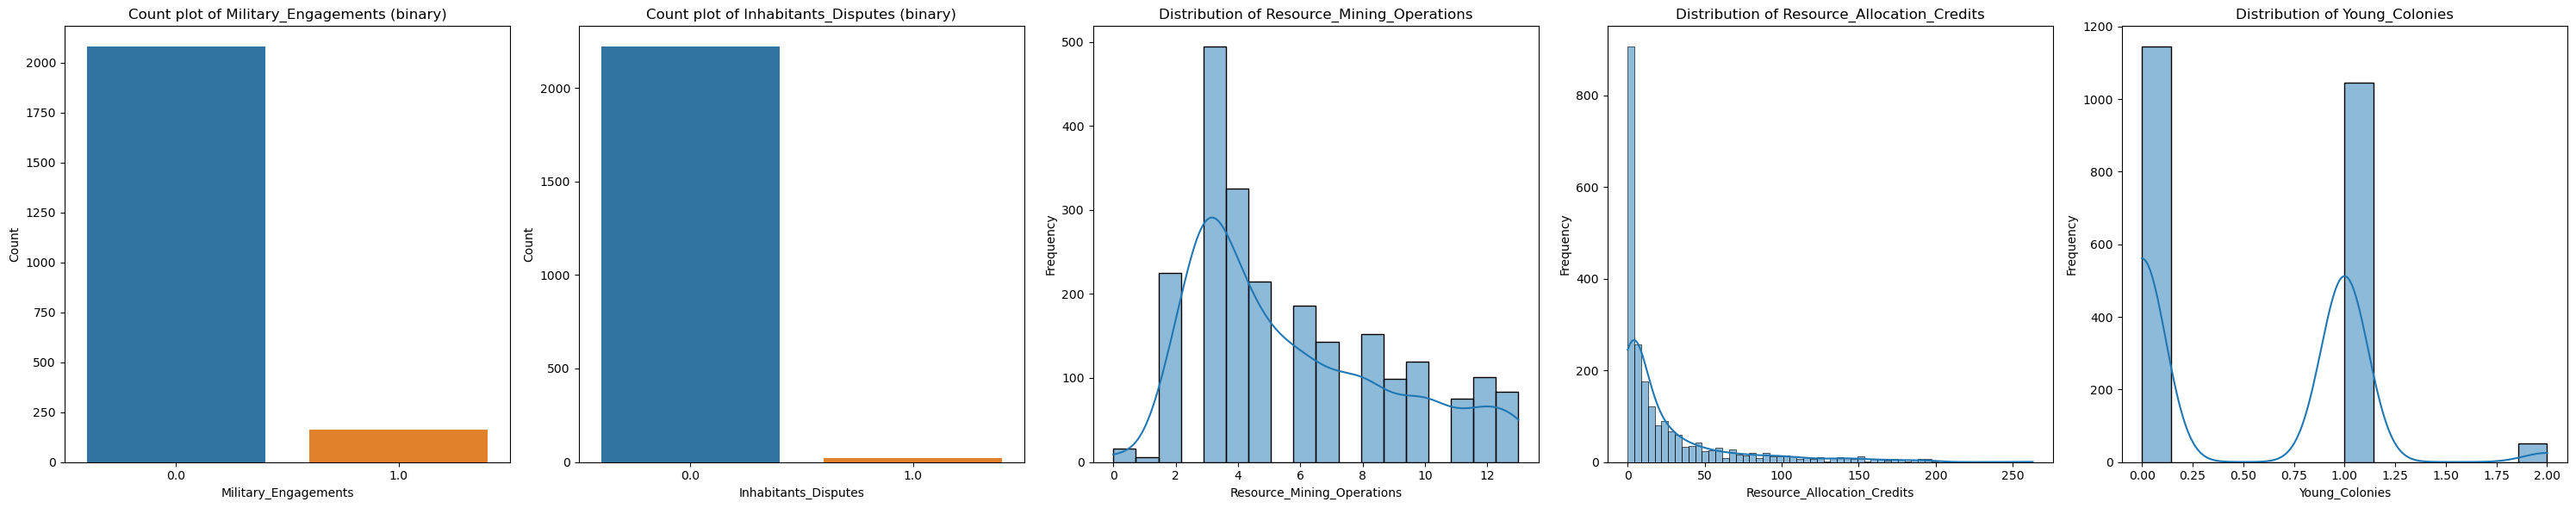

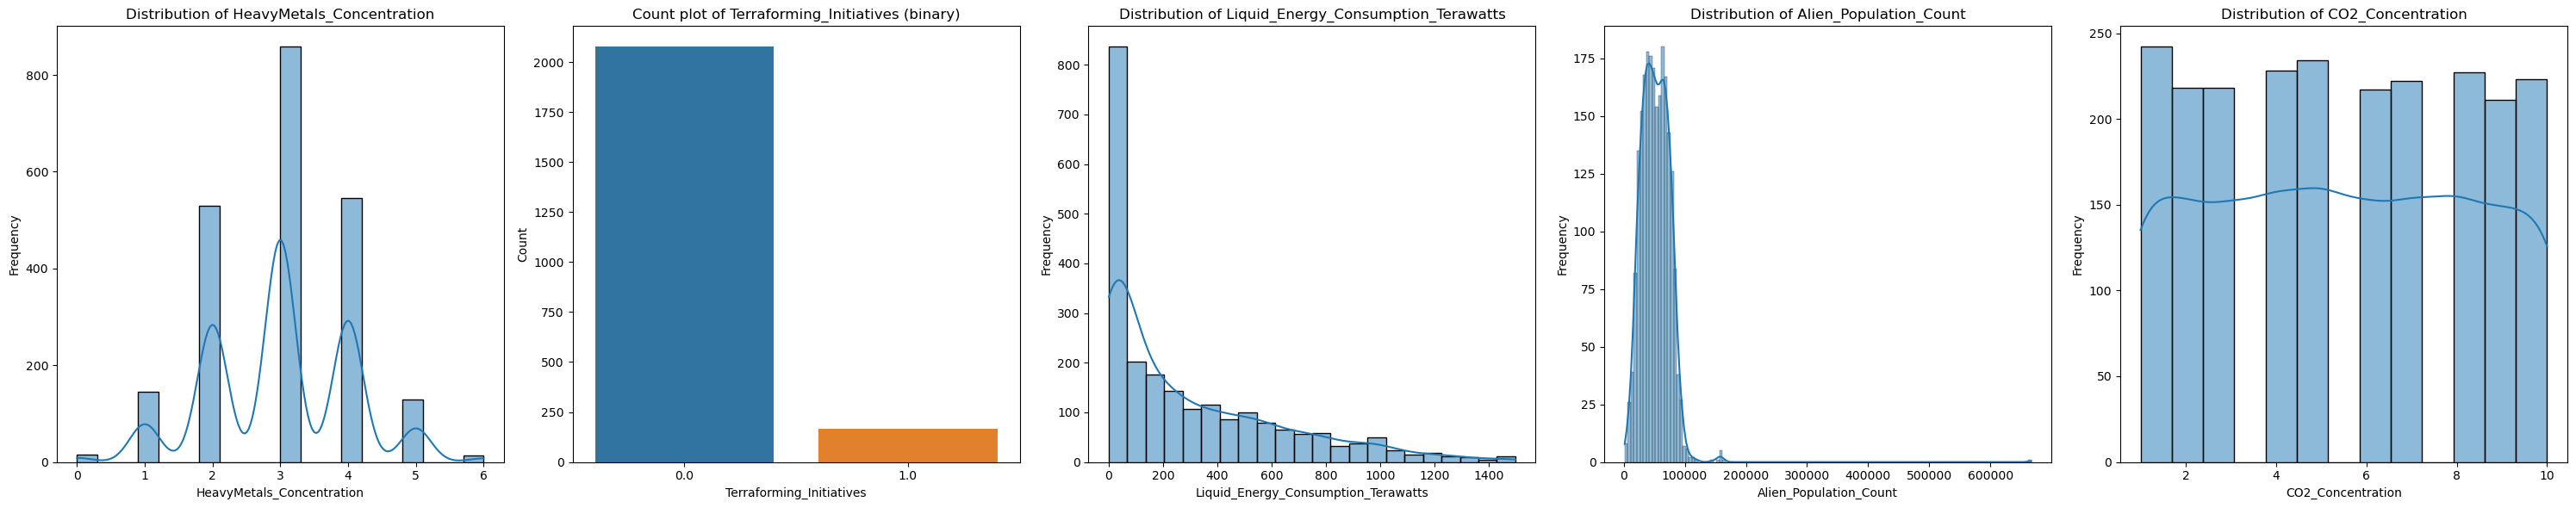

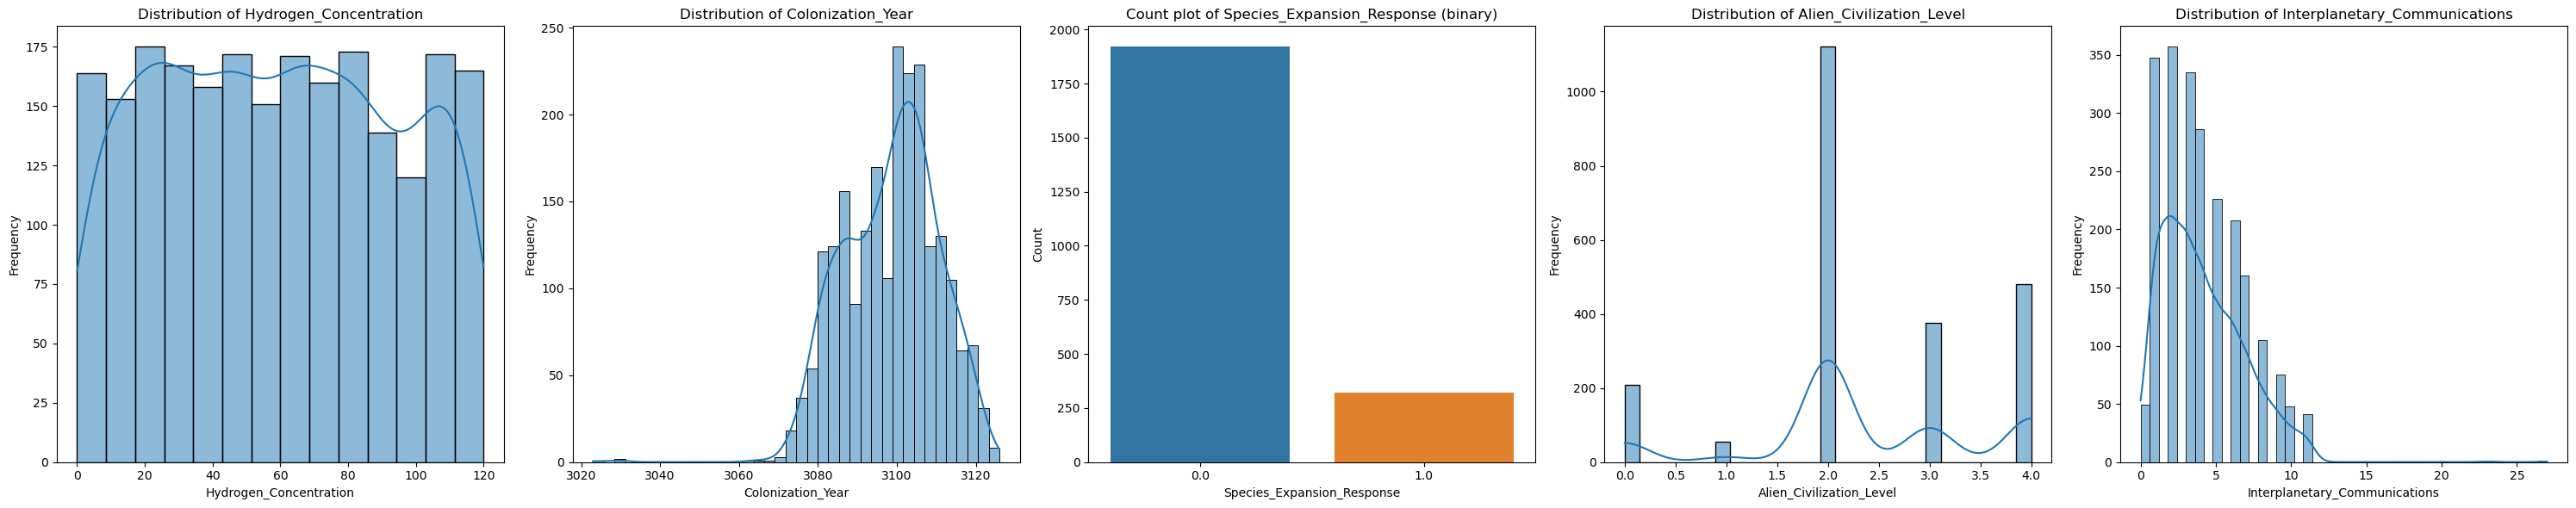

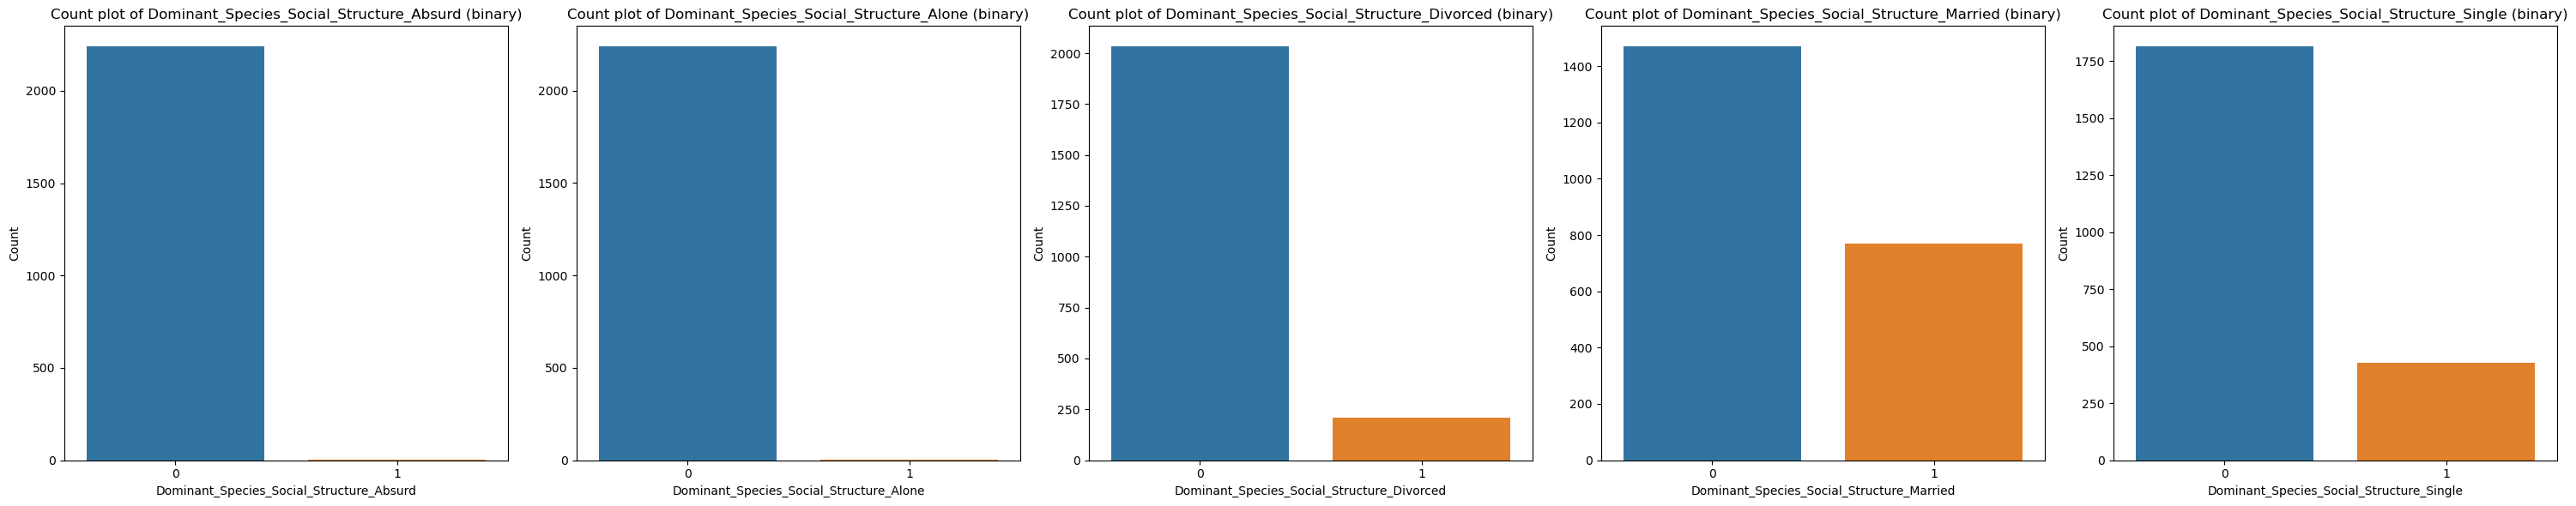

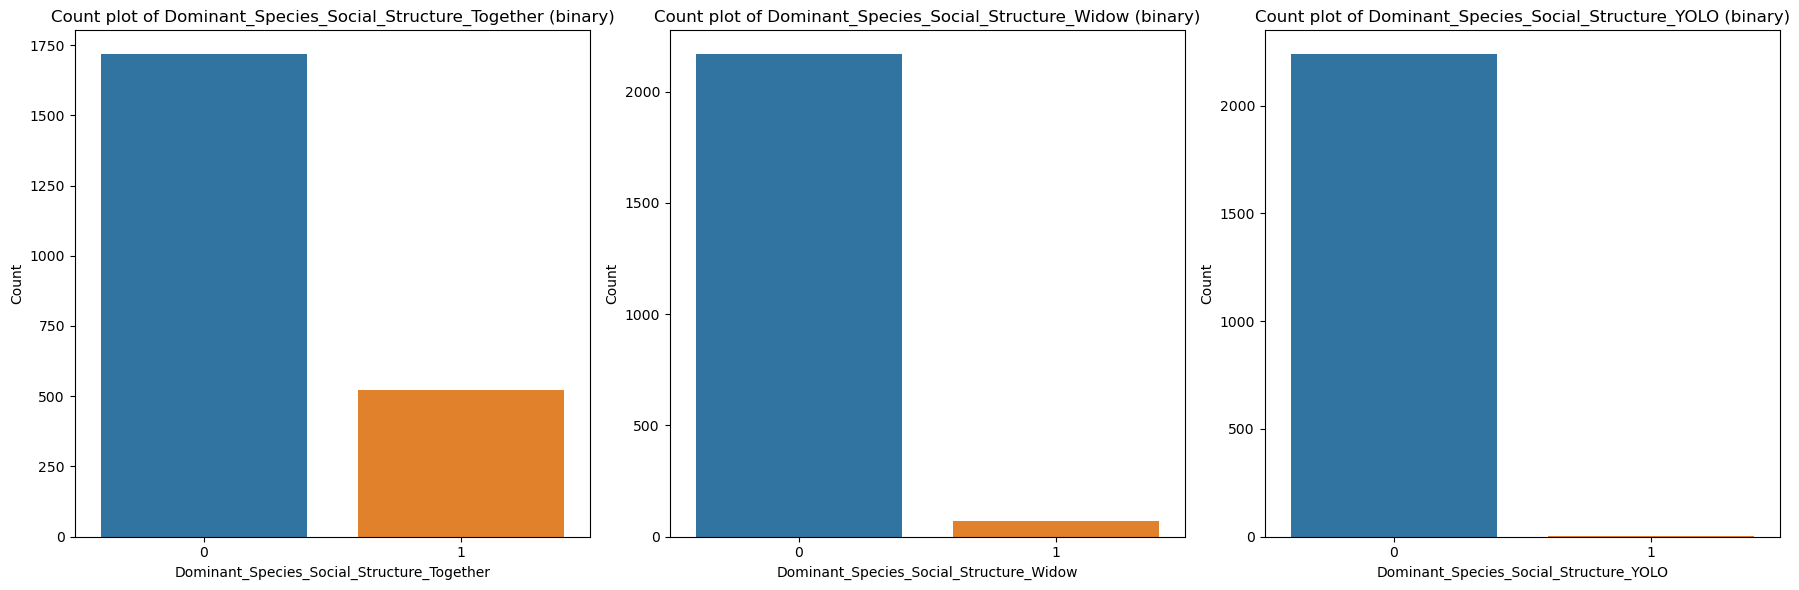

In [60]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 5
columns = df_in_progress.columns
perform_graphical_analysis(plots_per_row, columns, df_in_progress)

In [61]:
#Calculate the correlations after completing the values
correlation_df1 = high_correlations(df_in_progress)
combined_df = pd.concat([correlation_df, correlation_df1], axis=1)
combined_df.head(10)

Variable 1                           Variable 2  \
0              Mineral_Extraction_Tons                 Exploration_Missions   
1           Resource_Mining_Operations  Liquid_Energy_Consumption_Terawatts   
2                 Exploration_Missions  Liquid_Energy_Consumption_Terawatts   
3                 Food_Production_Tons            Biological_Research_Units   
4            Biological_Research_Units          Resource_Allocation_Credits   
5                 Food_Production_Tons          Resource_Allocation_Credits   
6              Mineral_Extraction_Tons            Biological_Research_Units   
7                 Exploration_Missions               Alien_Population_Count   
8  Liquid_Energy_Consumption_Terawatts        Interplanetary_Communications   
9  Liquid_Energy_Consumption_Terawatts               Alien_Population_Count   

   Correlation                  Variable 1  \
0     0.723468     Mineral_Extraction_Tons   
1     0.639129        Food_Production_Tons   
2     0.615159  Resource_Mining_Operations   
3     0.599803        Exploration_Missions   
4     0.574609                         NaN   
5     0.569224                         NaN   
6     0.567399                         NaN   
7     0.564253                         NaN   
8     0.562423                         NaN   
9     0.558047                         NaN   

                            Variable 2  Correlation  
0                 Exploration_Missions     0.620192  
1            Biological_Research_Units     0.534063  
2  Liquid_Energy_Consumption_Terawatts     0.515771  
3  Liquid_Energy_Consumption_Terawatts     0.511770  
4                                  NaN          NaN  
5                                  NaN          NaN  
6                                  NaN          NaN  
7                                  NaN          NaN  
8                                  NaN          NaN  
9                                  NaN          NaN

We see that the correlations dropped (significantly), we could have avoided this by using KNN to complete our variables.

## KNN complete missing values

In [62]:
df_in_progress_2 = df_prep.copy()
df_in_progress_2

Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
0                      0.0                         0.0                    1.0   
1                      0.0                         0.0                    2.0   
2                      NaN                         0.0                    1.0   
3                      0.0                         0.0                    1.0   
4                      0.0                         0.0                    0.0   
...                    ...                         ...                    ...   
2235                   0.0                         0.0                    2.0   
2236                   0.0                         0.0                    2.0   
2237                   0.0                         0.0                    1.0   
2238                   0.0                         0.0                    1.0   
2239                   0.0                         NaN                    0.0   

      Precious_Metal_Trade_Tons  Food_Production_Tons  \
0                          40.0                 107.0   
1                         108.0                  49.0   
2                         161.0                  53.0   
3                         107.0                   NaN   
4                          29.0                  59.0   
...                         ...                   ...   
2235                        7.0                   0.0   
2236                        8.0                   0.0   
2237                        4.0                   4.0   
2238                      149.0                  47.0   
2239                       10.0                   2.0   

      Trade_Agreements_Signed  Last_Contact_Days  Discovery_Date  \
0                         1.0               13.0        1.018263   
1                         1.0                NaN       -0.831594   
2                         NaN               61.0       -0.371167   
3                         3.0                NaN        0.847131   
4                         7.0               24.0       -0.053350   
...                       ...                ...             ...   
2235                      1.0                NaN             NaN   
2236                      2.0               39.0        0.647477   
2237                      2.0                0.0        0.403003   
2238                      1.0               92.0       -0.660461   
2239                      2.0               45.0        1.010114   

      Mineral_Extraction_Tons  Galactic_Visits  ...  Alien_Civilization_Level  \
0                       391.0              3.0  ...                       3.0   
1                         NaN              2.0  ...                       3.0   
2                       363.0              5.0  ...                       2.0   
3                        53.0              7.0  ...                       3.0   
4                       177.0              3.0  ...                       2.0   
...                       ...              ...  ...                       ...   
2235                     14.0              5.0  ...                       3.0   
2236                      NaN              5.0  ...                       4.0   
2237                     61.0              4.0  ...                       NaN   
2238                    197.0              4.0  ...                       2.0   
2239                      NaN              7.0  ...                       2.0   

      Interplanetary_Communications  Dominant_Species_Social_Structure_Absurd  \
0                               6.0                                         0   
1                               5.0                                         0   
2                               8.0                                         0   
3                               7.0                                         0   
4                               4.0                                         0   
...                             ...                                     

In [ ]:
# 1. Scale the data
scaler = StandardScaler()
df_in_progress_2_scaled = pd.DataFrame(scaler.fit_transform(df_in_progress_2), columns=df_in_progress_2.columns)

# 2. Apply KNN Imputer on scaled data
imputer = KNNImputer(n_neighbors=5)
housing_data_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_in_progress_2_scaled), columns=df_in_progress_2.columns)

# 3. Transform back to original values
df_in_progress_2 = pd.DataFrame(scaler.inverse_transform(housing_data_imputed_scaled), columns=df_in_progress_2.columns)

# Check if there are any remaining missing values
df_in_progress_2.isna().sum()
df_in_progress_2

# Source code: 'KNN imputer and how to choose regression techniques' lab

Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
0                      0.0                         0.0                    1.0   
1                      0.0                         0.0                    2.0   
2                      0.0                         0.0                    1.0   
3                      0.0                         0.0                    1.0   
4                      0.0                         0.0                    0.0   
...                    ...                         ...                    ...   
2235                   0.0                         0.0                    2.0   
2236                   0.0                         0.0                    2.0   
2237                   0.0                         0.0                    1.0   
2238                   0.0                         0.0                    1.0   
2239                   0.0                         0.0                    0.0   

      Precious_Metal_Trade_Tons  Food_Production_Tons  \
0                          40.0                 107.0   
1                         108.0                  49.0   
2                         161.0                  53.0   
3                         107.0                   3.0   
4                          29.0                  59.0   
...                         ...                   ...   
2235                        7.0                   0.0   
2236                        8.0                   0.0   
2237                        4.0                   4.0   
2238                      149.0                  47.0   
2239                       10.0                   2.0   

      Trade_Agreements_Signed  Last_Contact_Days  Discovery_Date  \
0                         1.0               13.0        1.018263   
1                         1.0               26.2       -0.831594   
2                         2.4               61.0       -0.371167   
3                         3.0               46.6        0.847131   
4                         7.0               24.0       -0.053350   
...                       ...                ...             ...   
2235                      1.0               59.8        0.220462   
2236                      2.0               39.0        0.647477   
2237                      2.0                0.0        0.403003   
2238                      1.0               92.0       -0.660461   
2239                      2.0               45.0        1.010114   

      Mineral_Extraction_Tons  Galactic_Visits  ...  Alien_Civilization_Level  \
0                       391.0              3.0  ...                       3.0   
1                       357.8              2.0  ...                       3.0   
2                       363.0              5.0  ...                       2.0   
3                        53.0              7.0  ...                       3.0   
4                       177.0              3.0  ...                       2.0   
...                       ...              ...  ...                       ...   
2235                     14.0              5.0  ...                       3.0   
2236                     16.4              5.0  ...                       4.0   
2237                     61.0              4.0  ...                       2.8   
2238                    197.0              4.0  ...                       2.0   
2239                     12.4              7.0  ...                       2.0   

      Interplanetary_Communications  Dominant_Species_Social_Structure_Absurd  \
0                               6.0                                       0.0   
1                               5.0                                       0.0   
2                               8.0                                       0.0   
3                               7.0                                       0.0   
4                               4.0                                       0.0   
...                             ...                                     

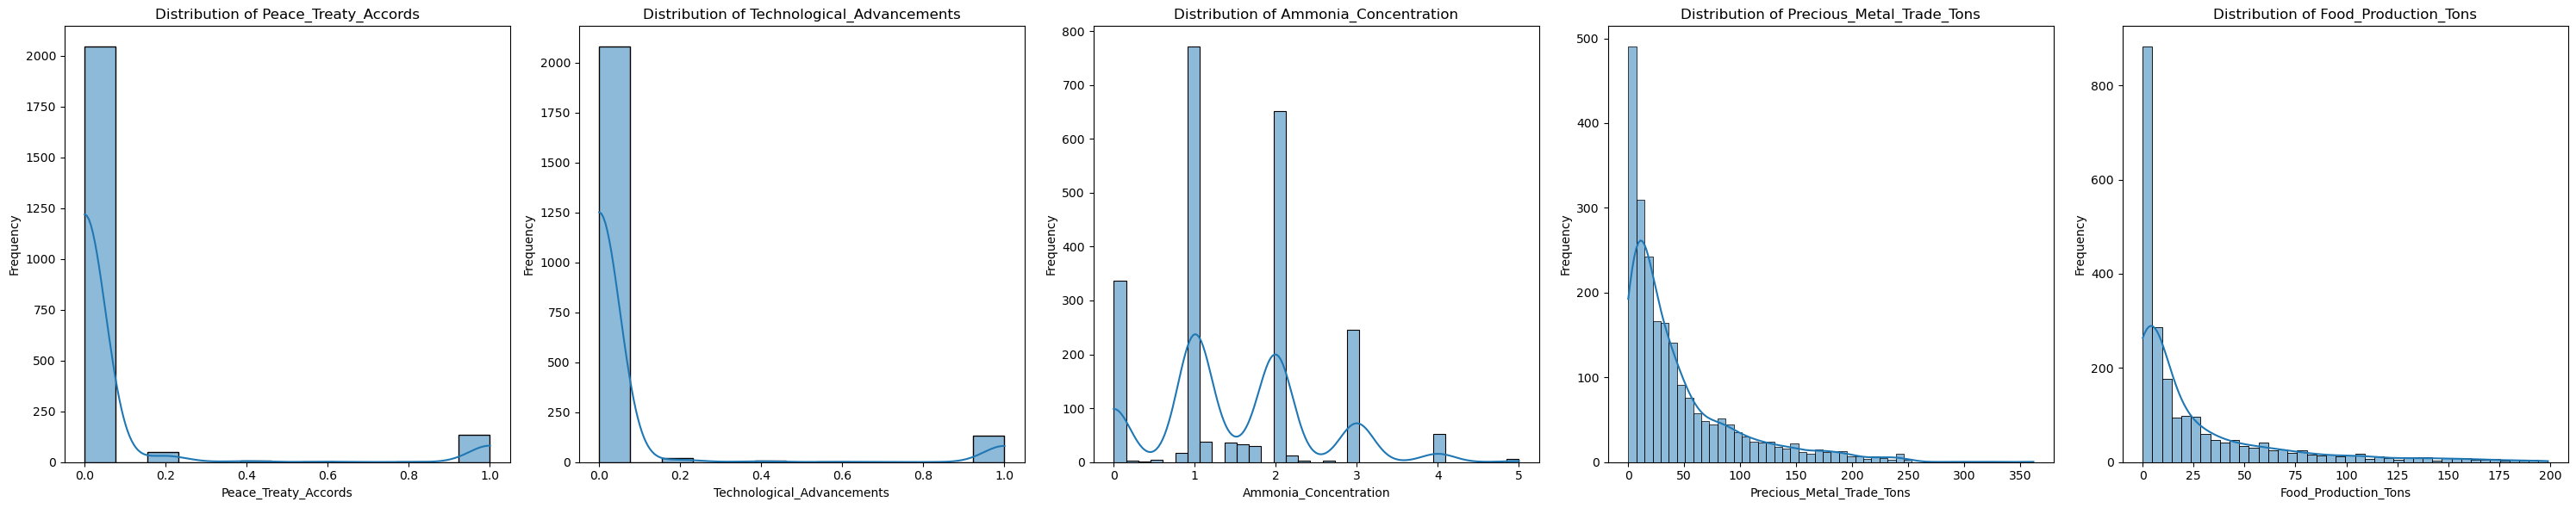

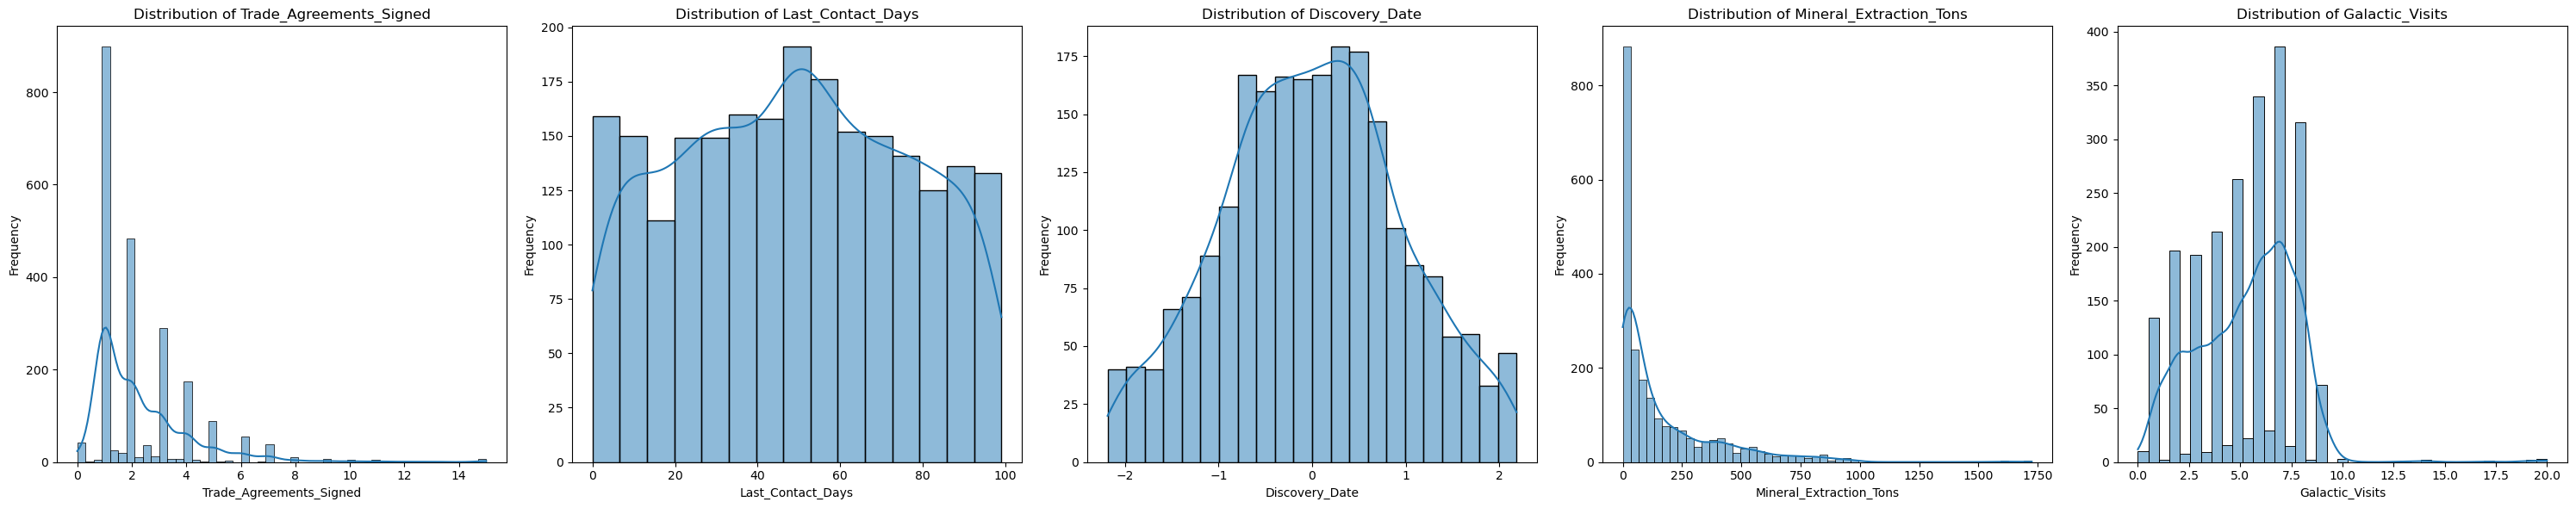

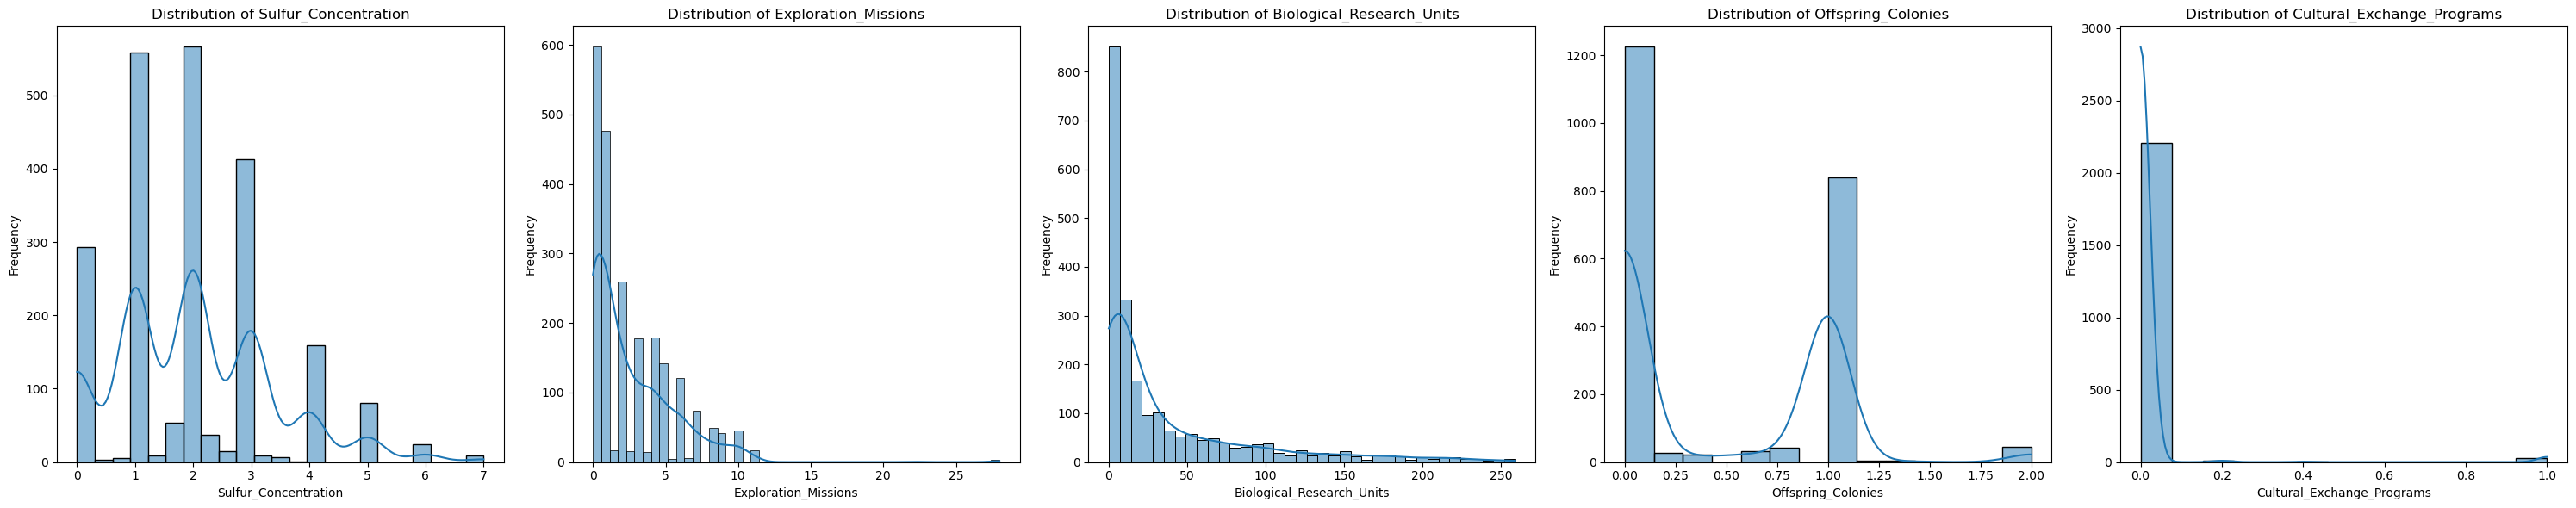

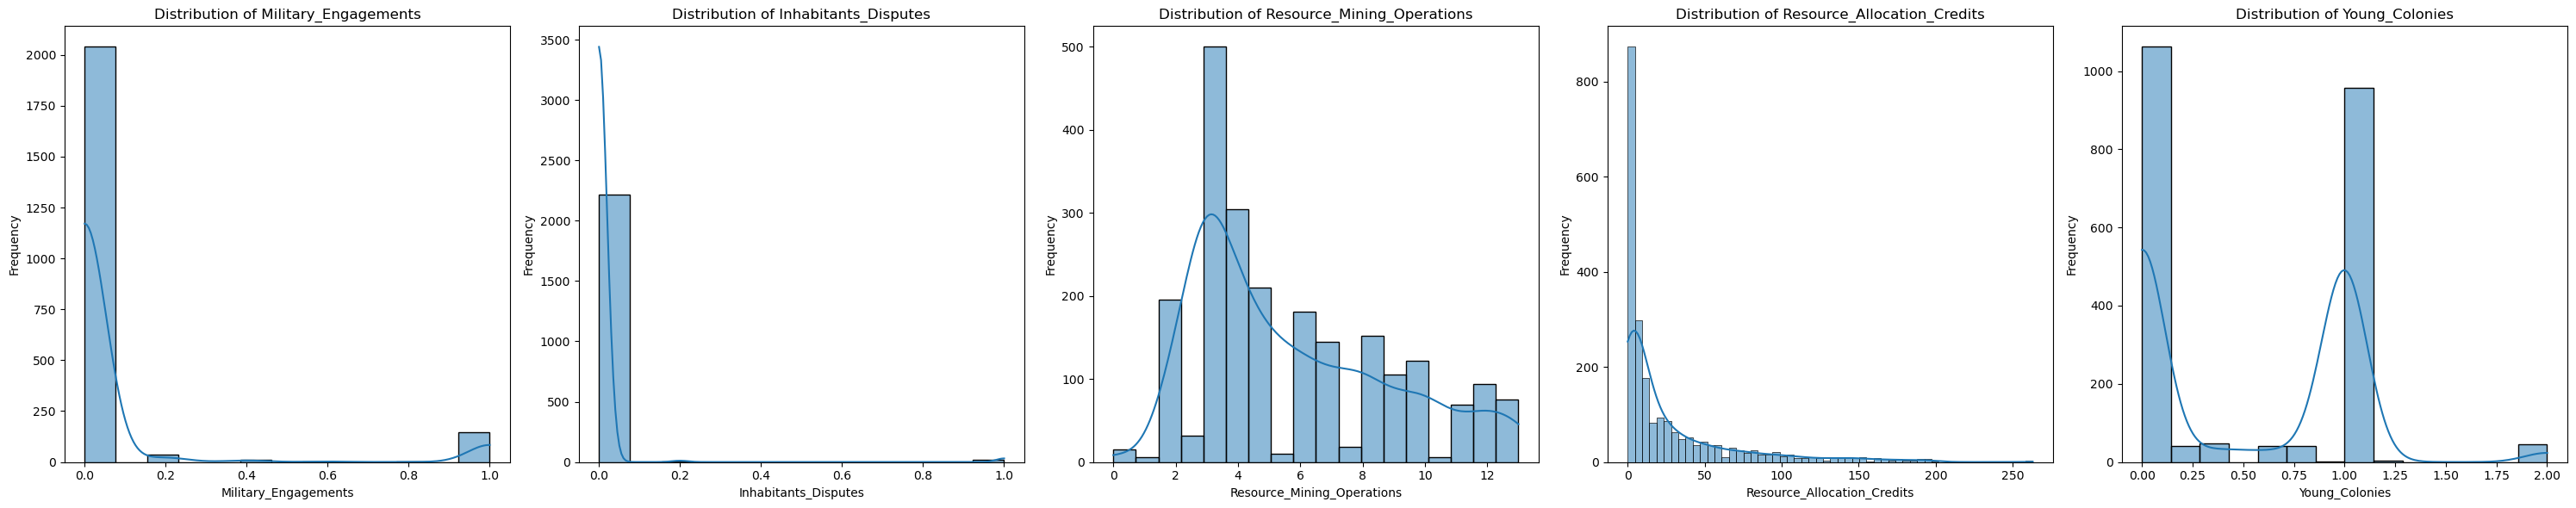

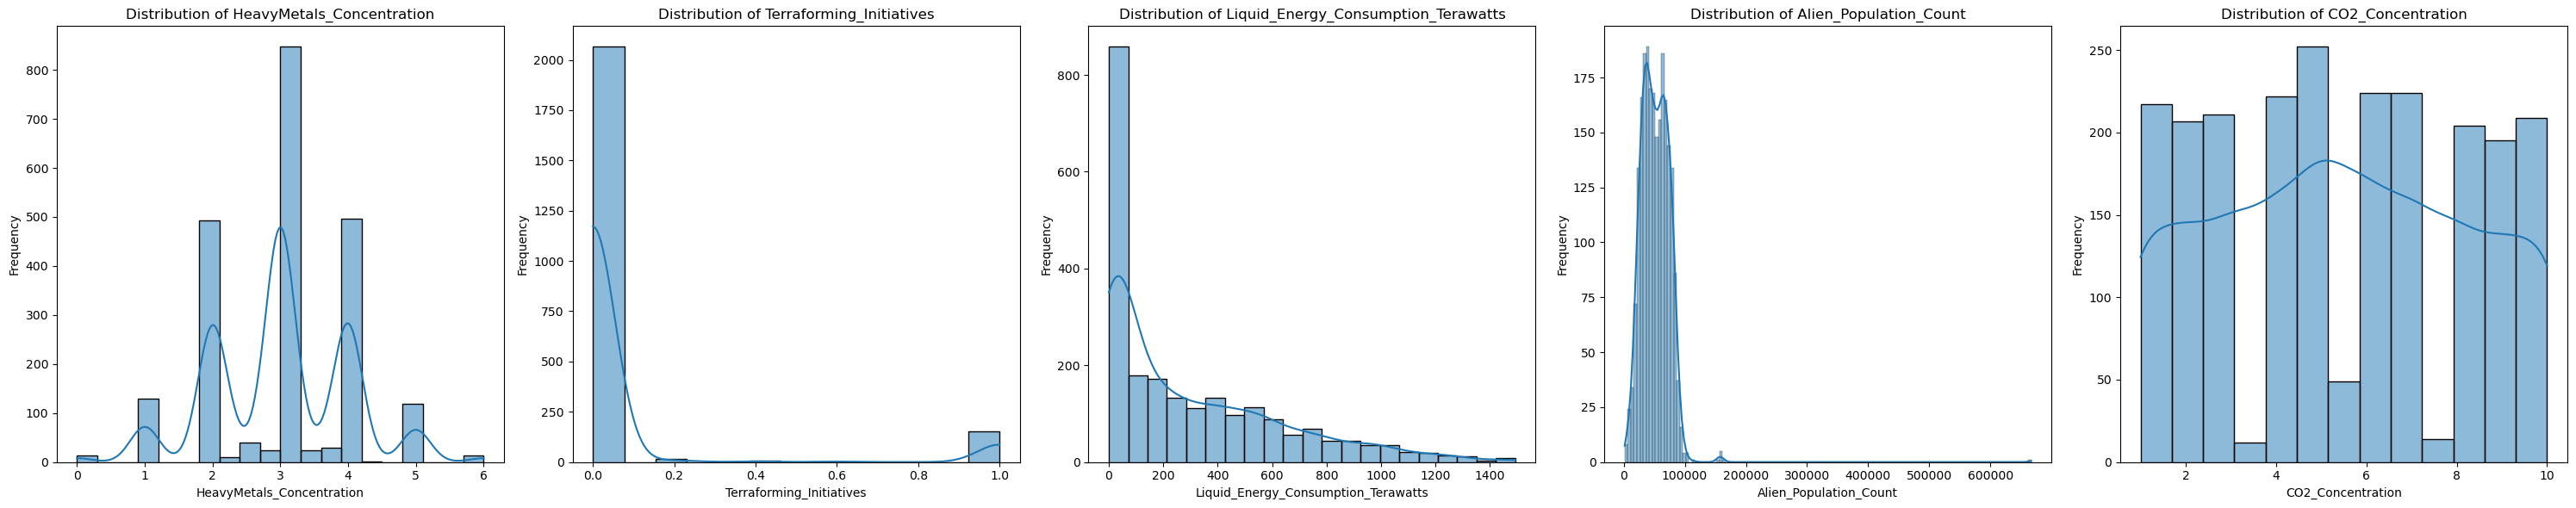

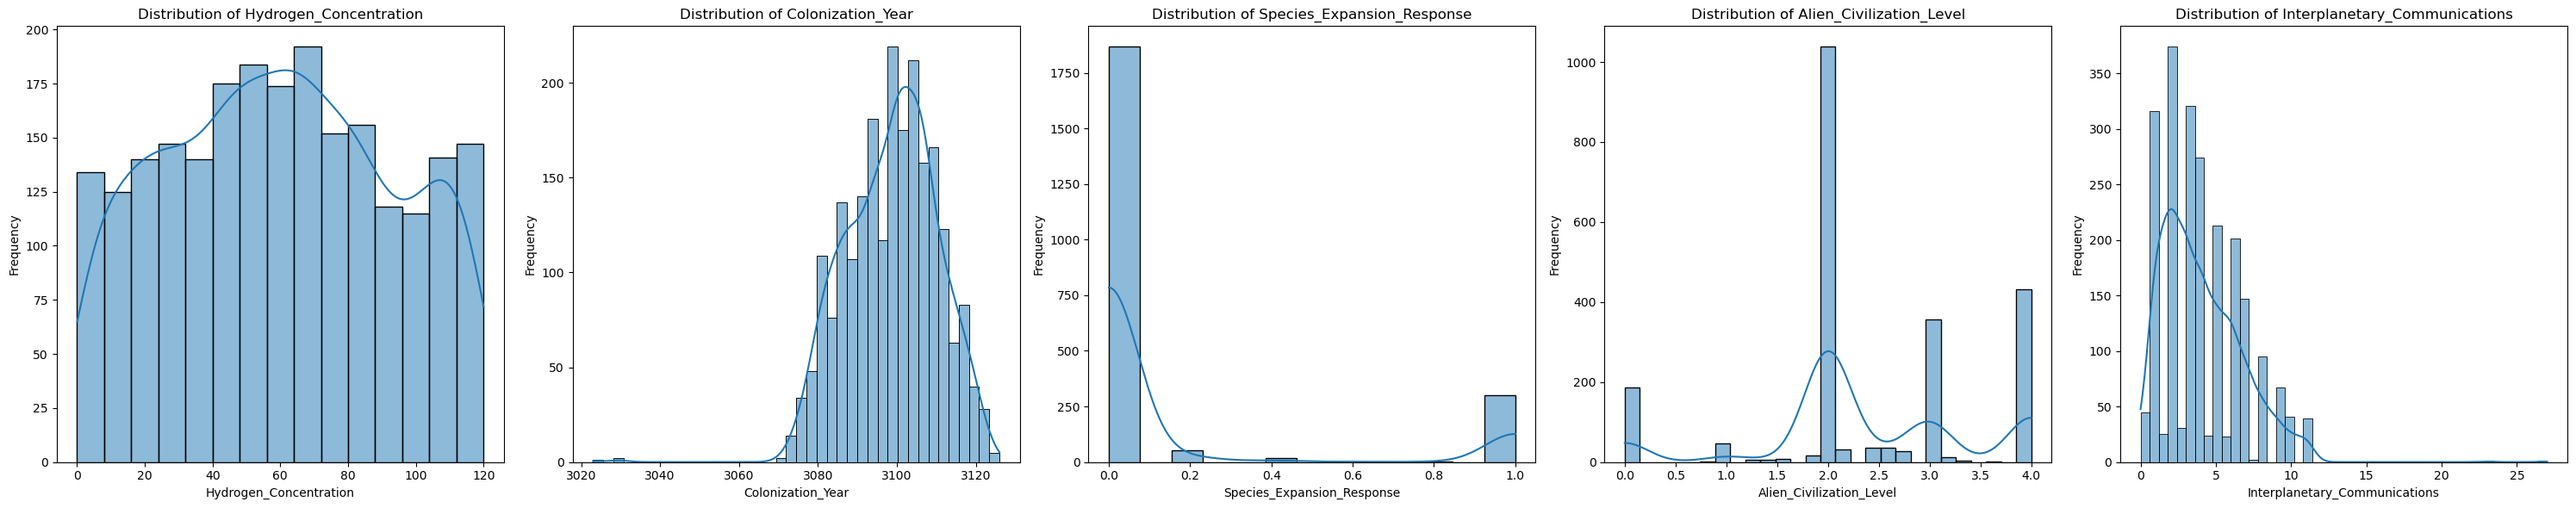

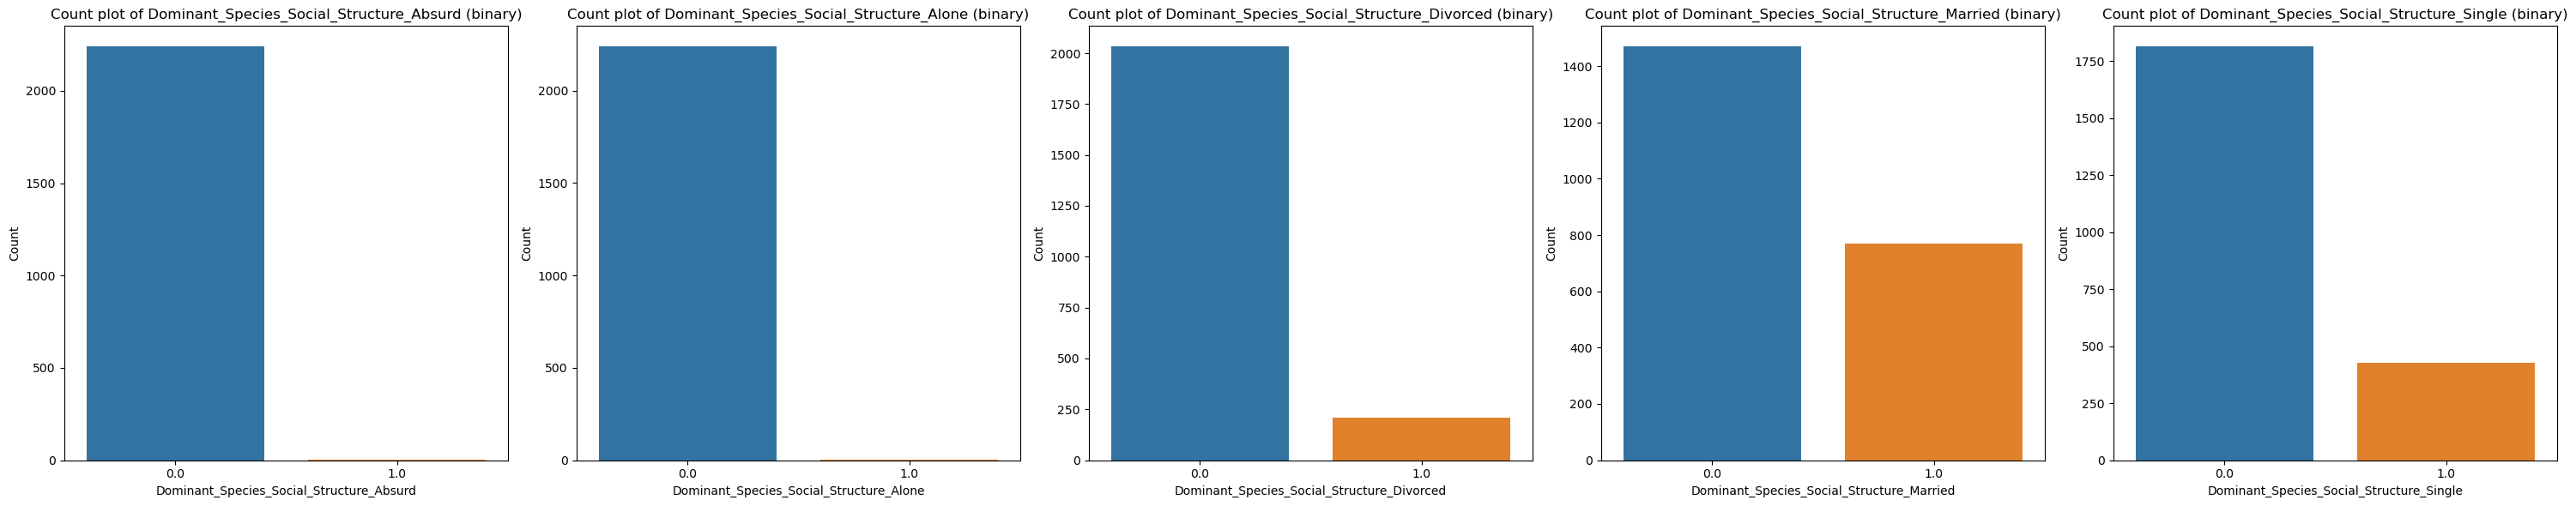

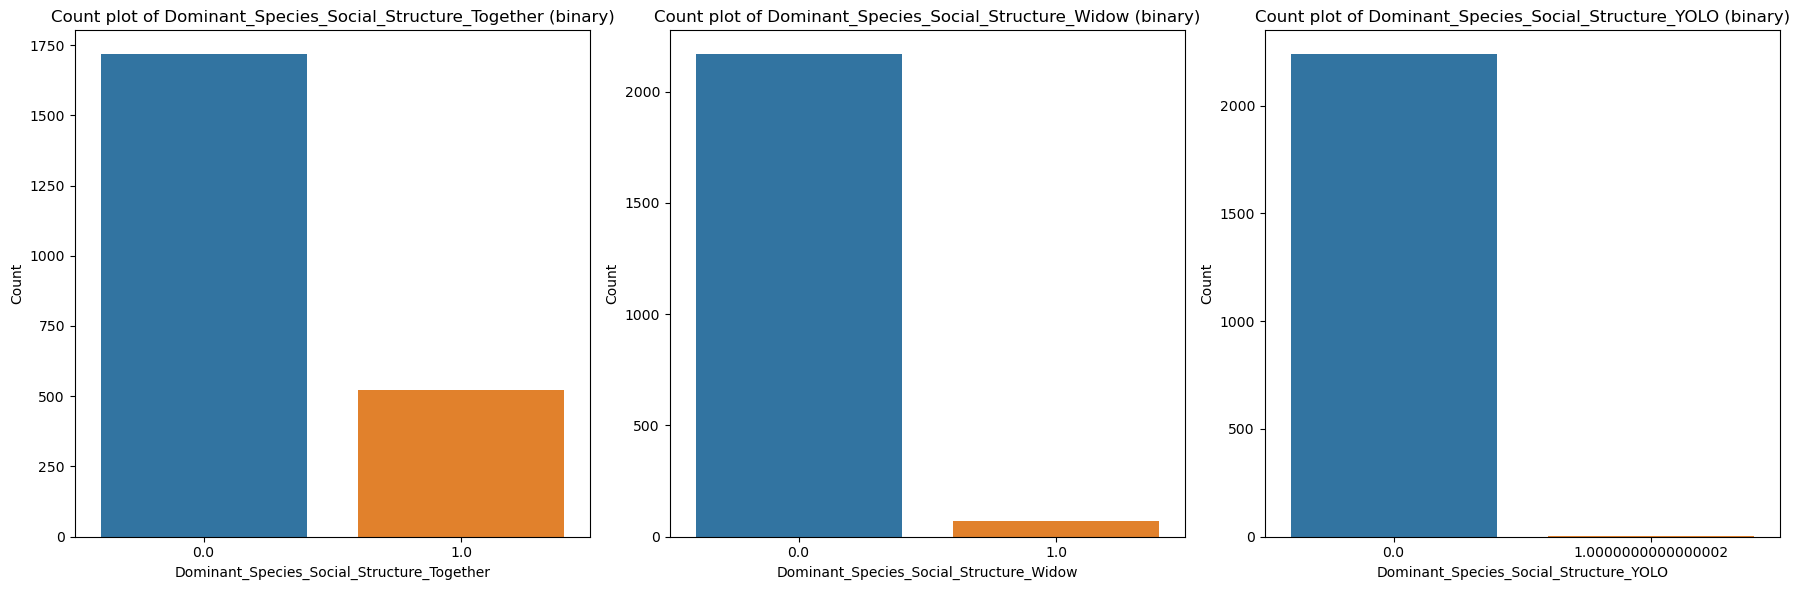

In [64]:
# Plot all variables to get an idea of the different distributions
plots_per_row = 5
columns = df_in_progress_2.columns
perform_graphical_analysis(plots_per_row, columns, df_in_progress_2)

We can now compare whether the correlations are better preserved than when we use the distributions to pad the values.
This is the case. We will continue to use this dataset and eventually compare it.

In [65]:
#Calculate the correlations after completing the values
correlation_df2 = high_correlations(df_in_progress_2)
combined_df = pd.concat([correlation_df, correlation_df2], axis=1)
combined_df.head(10)

Variable 1                           Variable 2  \
0              Mineral_Extraction_Tons                 Exploration_Missions   
1           Resource_Mining_Operations  Liquid_Energy_Consumption_Terawatts   
2                 Exploration_Missions  Liquid_Energy_Consumption_Terawatts   
3                 Food_Production_Tons            Biological_Research_Units   
4            Biological_Research_Units          Resource_Allocation_Credits   
5                 Food_Production_Tons          Resource_Allocation_Credits   
6              Mineral_Extraction_Tons            Biological_Research_Units   
7                 Exploration_Missions               Alien_Population_Count   
8  Liquid_Energy_Consumption_Terawatts        Interplanetary_Communications   
9  Liquid_Energy_Consumption_Terawatts               Alien_Population_Count   

   Correlation                           Variable 1  \
0     0.723468              Mineral_Extraction_Tons   
1     0.639129           Resource_Mining_Operations   
2     0.615159                 Exploration_Missions   
3     0.599803                 Food_Production_Tons   
4     0.574609                 Exploration_Missions   
5     0.569224  Liquid_Energy_Consumption_Terawatts   
6     0.567399              Mineral_Extraction_Tons   
7     0.564253            Biological_Research_Units   
8     0.562423              Mineral_Extraction_Tons   
9     0.558047                 Food_Production_Tons   

                            Variable 2  Correlation  
0                 Exploration_Missions     0.730614  
1  Liquid_Energy_Consumption_Terawatts     0.648019  
2  Liquid_Energy_Consumption_Terawatts     0.635563  
3            Biological_Research_Units     0.605731  
4               Alien_Population_Count     0.590708  
5               Alien_Population_Count     0.582969  
6            Biological_Research_Units     0.580145  
7          Resource_Allocation_Credits     0.579757  
8               Alien_Population_Count     0.577943  
9          Resource_Allocation_Credits     0.577380

In [ ]:
"""Remove cell before uploading"""
#df_in_progress_2.to_csv('filename.csv', index=False)

## Hierarchical clustering

In [67]:
# Define the numerical columns to scale (including already one-hot encoded columns)
numerical_cols = df_in_progress_2.columns

# Define the ColumnTransformer to scale numerical columns only
preprocessor_standard = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
    ]
)

# Fit and transform the data
data_preprocessed_standard = preprocessor_standard.fit_transform(df_in_progress_2)

# Convert the transformed data into a DataFrame and assign the column names
data_preprocessed_standard_df = pd.DataFrame(data_preprocessed_standard, columns=numerical_cols)

# Display the first few rows of the preprocessed data
data_preprocessed_standard_df.head()

Peace_Treaty_Accords  Technological_Advancements  Ammonia_Concentration  \
0             -0.278987                   -0.264215              -0.492691   
1             -0.278987                   -0.264215               0.541056   
2             -0.278987                   -0.264215              -0.492691   
3             -0.278987                   -0.264215              -0.492691   
4             -0.278987                   -0.264215              -1.526439   

   Precious_Metal_Trade_Tons  Food_Production_Tons  Trade_Agreements_Signed  \
0                  -0.077711              2.124649                -0.716424   
1                   1.256120              0.609141                -0.716424   
2                   2.295723              0.713659                 0.048907   
3                   1.236505             -0.592814                 0.376906   
4                  -0.293478              0.870435                 2.563565   

   Last_Contact_Days  Discovery_Date  Mineral_Extraction_Tons  \
0          -1.288764        1.058806                 1.026862   
1          -0.813469       -0.868008                 0.876100   
2           0.439580       -0.388427                 0.899713   
3          -0.078923        0.880555                -0.508008   
4          -0.892685       -0.057388                 0.055081   

   Galactic_Visits  ...  Alien_Civilization_Level  \
0        -0.977853  ...                  0.567086   
1        -1.399098  ...                  0.567086   
2        -0.135363  ...                 -0.359850   
3         0.707128  ...                  0.567086   
4        -0.977853  ...                 -0.359850   

   Interplanetary_Communications  Dominant_Species_Social_Structure_Absurd  \
0                       0.745564                                 -0.021134   
1                       0.365538                                 -0.021134   
2                       1.505617                                 -0.021134   
3                       1.125591                                 -0.021134   
4                      -0.014489                                 -0.021134   

   Dominant_Species_Social_Structure_Alone  \
0                                -0.036621   
1                                -0.036621   
2                                -0.036621   
3                                -0.036621   
4                                -0.036621   

   Dominant_Species_Social_Structure_Divorced  \
0                                   -0.319941   
1                                   -0.319941   
2                                   -0.319941   
3                                   -0.319941   
4                                   -0.319941   

   Dominant_Species_Social_Structure_Married  \
0                                   1.380332   
1                                  -0.724463   
2                                   1.380332   
3                                  -0.724463   
4                                  -0.724463   

   Dominant_Species_Social_Structure_Single  \
0                                 -0.485305   
1                                  2.060559   
2                                 -0.485305   
3                                 -0.485305   
4                                 -0.485305   

   Dominant_Species_Social_Structure_Together  \
0                                   -0.551907   
1                                   -0.551907   
2                                   -0.551907   
3                                    1.811900   
4                                    1.811900   

   Dominant_Species_Social_Structure_Widow  \
0                                -0.182237   
1                                -0.182237   
2                                -0.182237   
3                                -0.182237   
4                                -0.182237   

   Dominant_Species_Social_Structure_YOLO  
0                               -0.029894  
1                               -0.029894  
2                               

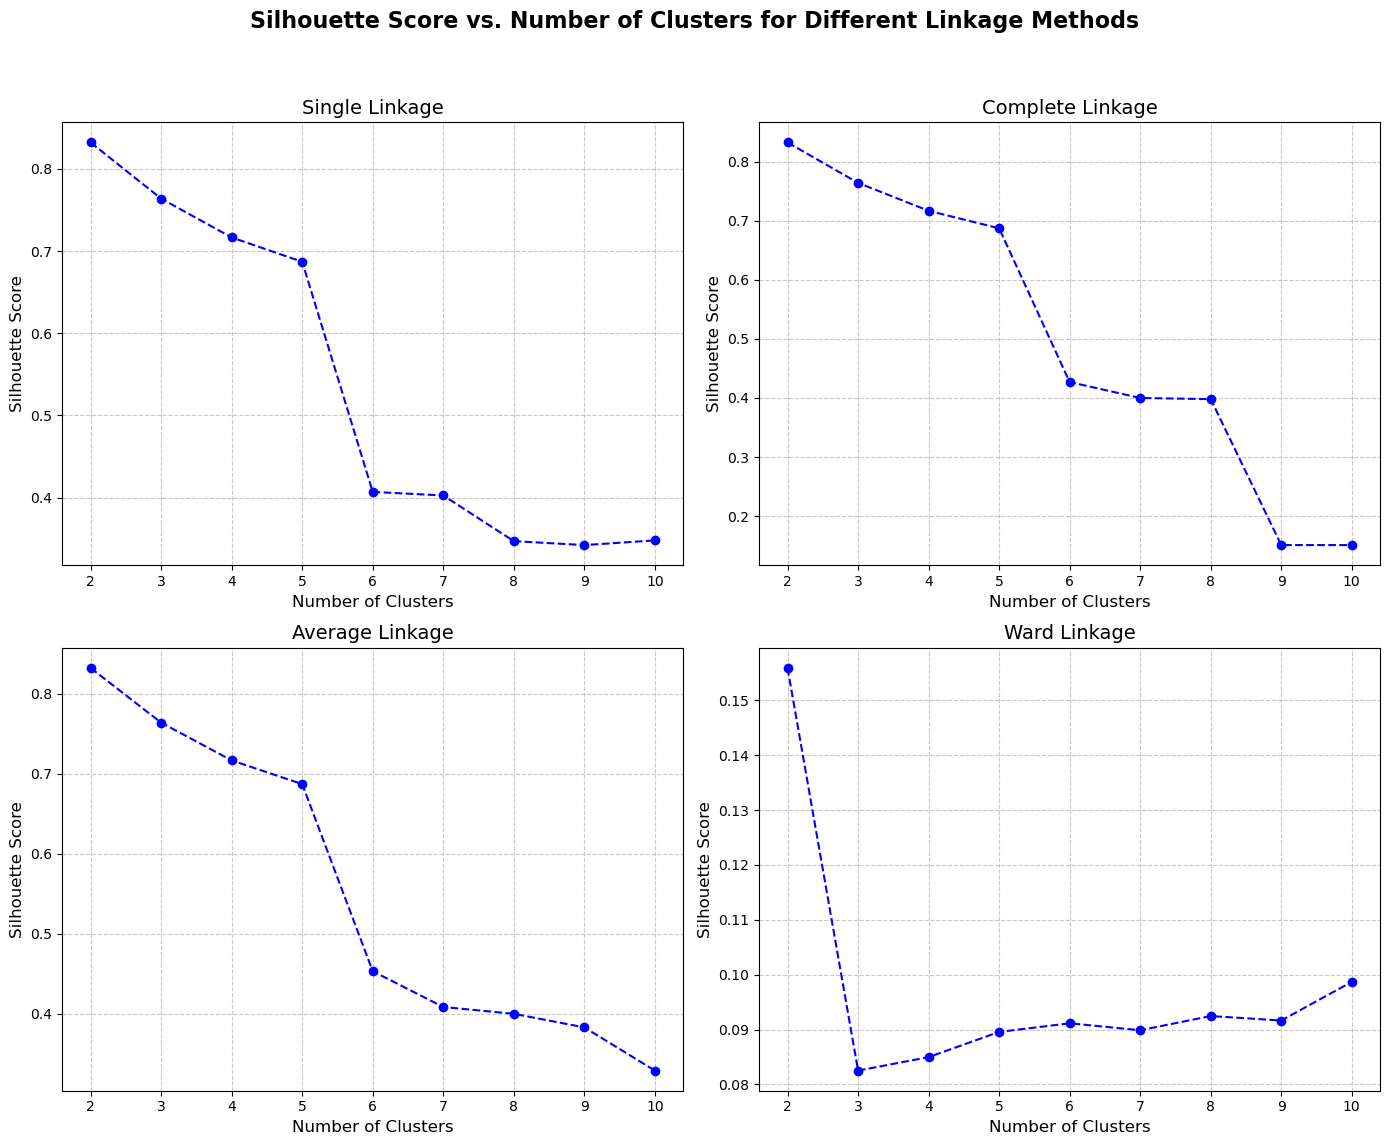

In [68]:
# Define a function to calculate silhouette scores and plot for different linkage methods
def silhouette_scores_multiple_linkages(data, max_clusters=10):
    linkage_methods = ['single', 'complete', 'average', 'ward']
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle('Silhouette Score vs. Number of Clusters for Different Linkage Methods', fontsize=16, fontweight='bold')
    
    # Iterate over each linkage method and calculate silhouette scores
    for i, method in enumerate(linkage_methods):
        # Generate the linkage matrix
        Z = linkage(data, method=method)
        
        sil_scores = []
        cluster_range = range(2, max_clusters + 1)
        
        for n_clusters in cluster_range:
            # Cut the dendrogram at the desired number of clusters
            labels = fcluster(Z, n_clusters, criterion='maxclust')
            sil_score = silhouette_score(data, labels)
            sil_scores.append(sil_score)
        
        # Plot silhouette scores for the current linkage method
        ax = axs[i // 2, i % 2]
        ax.plot(cluster_range, sil_scores, marker='o', linestyle='--', color='b')
        ax.set_title(f'{method.capitalize()} Linkage', fontsize=14)
        ax.set_xlabel('Number of Clusters', fontsize=12)
        ax.set_ylabel('Silhouette Score', fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Apply the function to the preprocessed data
silhouette_scores_multiple_linkages(data_preprocessed_standard_df, max_clusters=10)

Based on the silhouette score analysis across different linkage methods:
* Single, Complete, and Average Linkage methods indicate that the silhouette score is highest when using 2 to 4 clusters, with a noticeable drop as more clusters are added. This suggests that a smaller number of clusters (ideally 2 to 4) provides the best-defined clustering structure for these linkage methods.
* Ward Linkage shows lower silhouette scores overall but demonstrates relatively stable performance, with a slight improvement starting around 3 to 5 clusters. Given Ward’s focus on minimizing within-cluster variance, this range may provide balanced clusters.

Conclusion:

The optimal number of clusters appears to be between 2 and 4 based on the silhouette scores for most linkage methods, particularly for Single, Complete, and Average linkage. If you are aiming for more balanced clusters, consider 3 clusters as a compromise that performs well across all methods, including Ward Linkage.